## 1. Data Understanding and Exploration

In [134]:
# Import all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings('ignore')



In [135]:
# Load the data
housing = pd.read_csv('train.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [136]:
# Check the shape of the data
housing.shape

(1460, 81)

In [137]:
# Check the data types of the columns
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [138]:
# Check the summary statistics of the data
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [139]:
# Check the missing percentage in the data
missing = (housing.isnull().sum()/len(housing)*100). sort_values(ascending = False)
missing.head(20)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
Id               0.000000
dtype: float64

In [140]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [141]:
# Drop the columns with more than 50% missing values
housing = housing.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis = 1)

In [142]:
housing[['LotFrontage','MasVnrArea','GarageYrBlt']].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


In [143]:
# Treating missing values by imputing by checking outliers
housing['LotFrontage'] = housing['LotFrontage'].fillna(housing['LotFrontage'].median()) # median imputation as there are outliers
housing['MasVnrArea'] = housing['MasVnrArea'].fillna(housing['MasVnrArea'].median()) # median imputation as there are outliers
housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna(housing['GarageYrBlt'].mean()) # mean imputation as there are no outliers

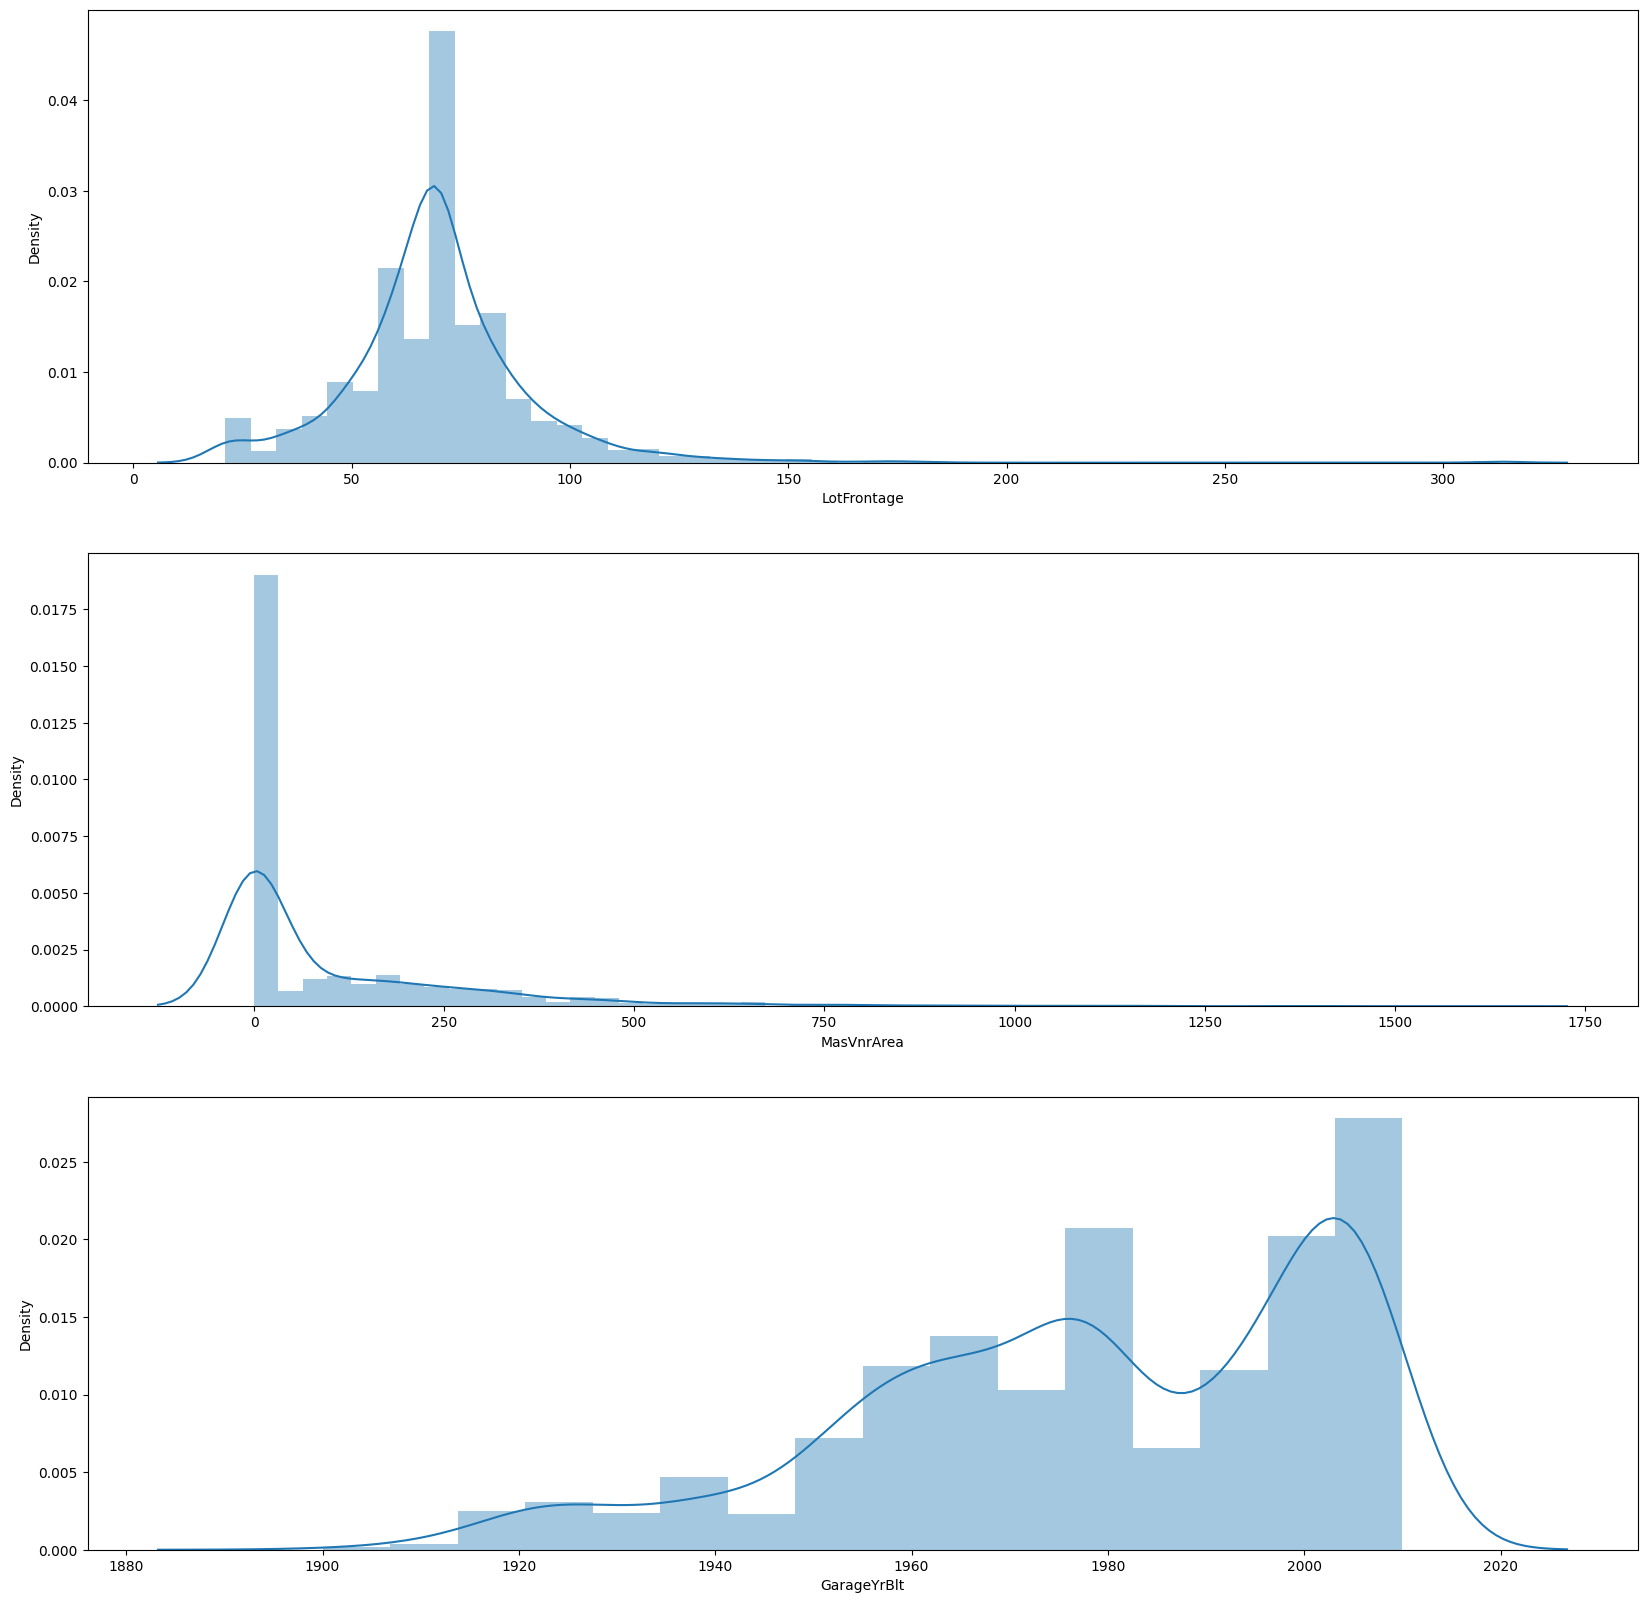

In [144]:
# Plotting the variables where the missing values are imputed
plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
sns.distplot(housing['LotFrontage'])
plt.subplot(3,1,2)
sns.distplot(housing['MasVnrArea'])
plt.subplot(3,1,3)
sns.distplot(housing['GarageYrBlt'])
plt.show()

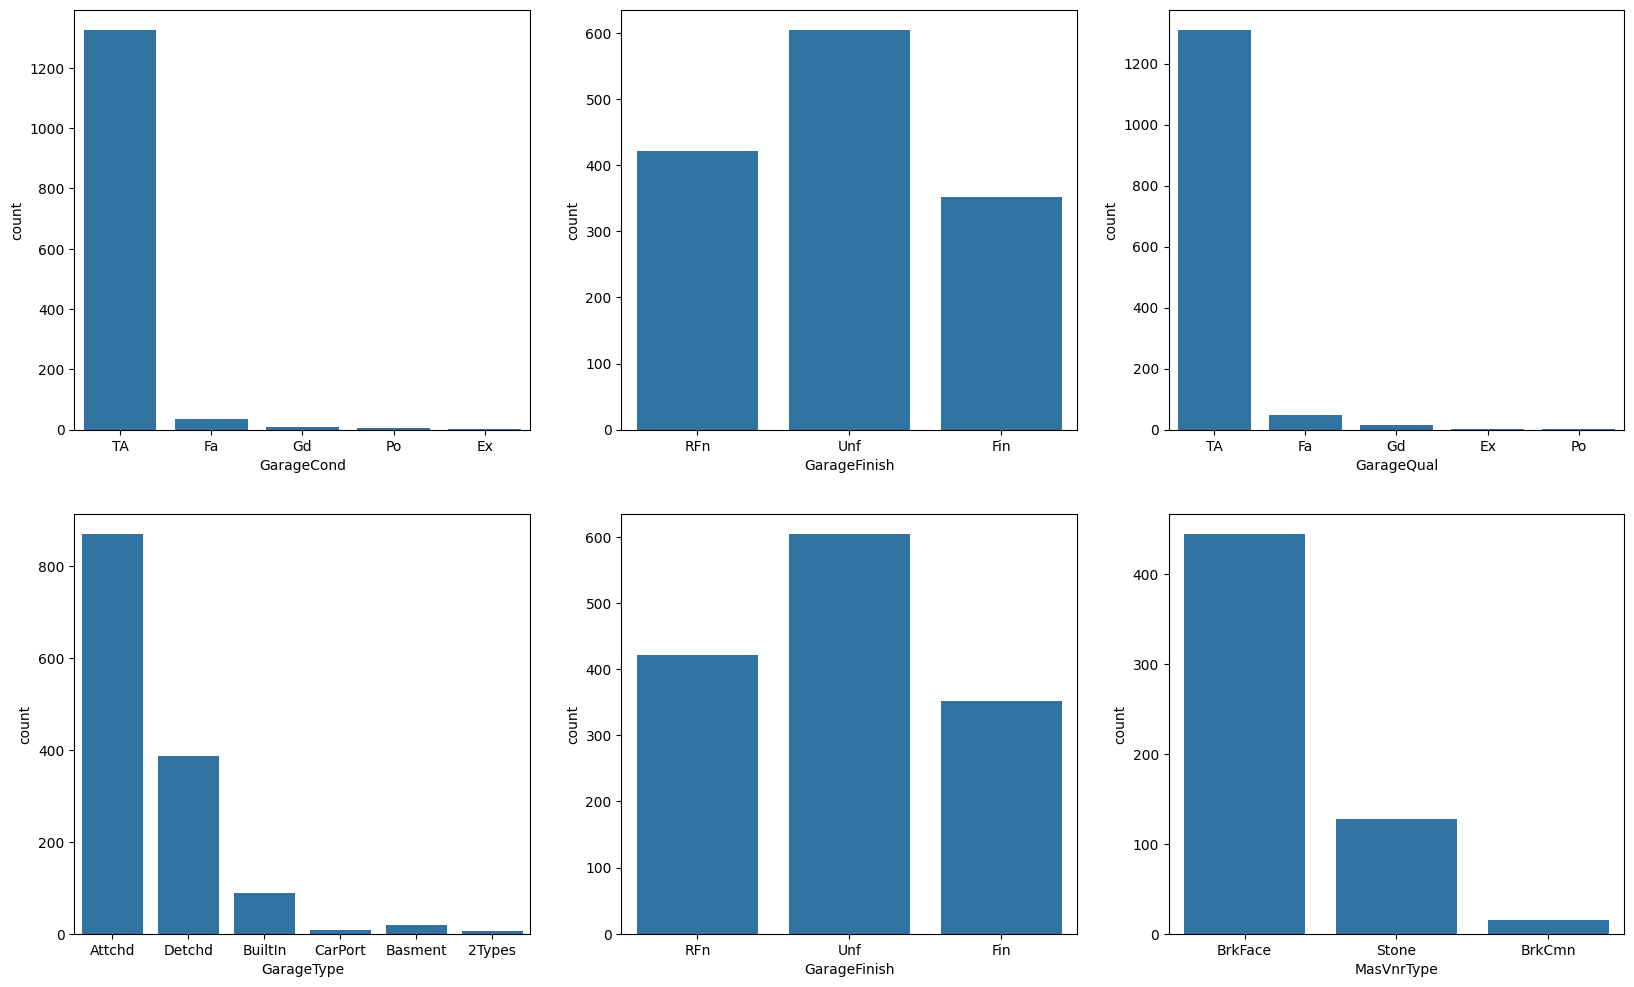

In [146]:
# Visualizing the missing values in the data

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'GarageCond', data = housing)

plt.subplot(2,3,2)
sns.countplot(x = 'GarageFinish',  data = housing)

plt.subplot(2,3,3)
sns.countplot(x = 'GarageQual', data = housing)
plt.subplot(2,3,4)
sns.countplot(x = 'GarageType', data = housing)
plt.subplot(2,3,5)
sns.countplot(x = 'GarageFinish',  data = housing)
plt.subplot(2,3,6)
sns.countplot(x = 'MasVnrType', data = housing)
plt.show()

In [147]:
# some houses have 0 garage area, which means no garage, so replacing the missing values with No Garage
housing['GarageType'] = housing['GarageType'].fillna('No Garage')
housing['GarageFinish'] = housing['GarageFinish'].fillna('No Garage')
housing['GarageQual'] = housing['GarageQual'].fillna('No Garage')
housing['GarageCond'] = housing['GarageCond'].fillna('No Garage')
housing['MasVnrType'] = housing['MasVnrType'].fillna('None') # Replace missing values with None which is the most common value
housing['Electrical'] = housing['Electrical'].fillna('SBrkr') # Replace missing values with SBrkr which is the most common value

In [149]:
# Change the data type of some of the variables from numerical to categorical to form dummies
housing['MSSubClass']=housing['MSSubClass'].replace({20:'1-STORY 1946 & NEWER ALL STYLES',30:'1-STORY 1945 & OLDER',40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

housing['OverallQual']=housing['OverallQual'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})
housing['OverallCond']=housing['OverallCond'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})


In [150]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


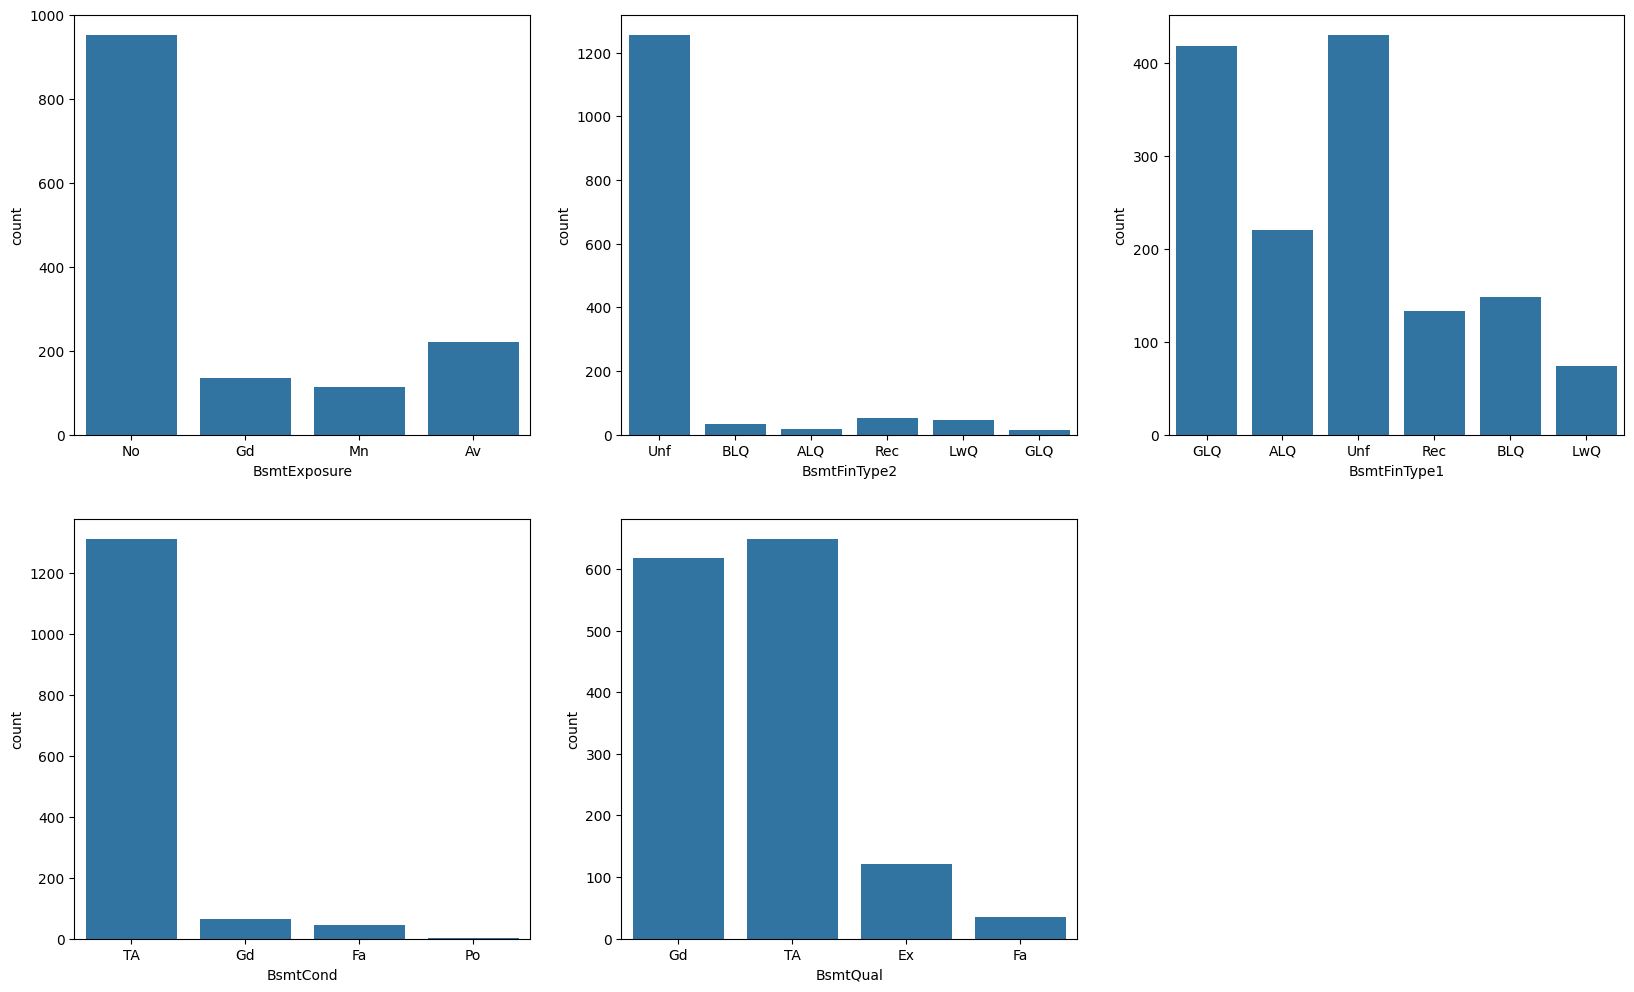

In [151]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'BsmtExposure', data = housing)

plt.subplot(2,3,2)
sns.countplot(x = 'BsmtFinType2',  data = housing)

plt.subplot(2,3,3)
sns.countplot(x = 'BsmtFinType1', data = housing)
plt.subplot(2,3,4)
sns.countplot(x = 'BsmtCond', data = housing)
plt.subplot(2,3,5)
sns.countplot(x = 'BsmtQual',  data = housing)

plt.show()

In [152]:
# Houses with no basement have missing values in these columns, so replacing them with No Basement
housing['BsmtExposure'] = housing['BsmtExposure'].fillna('No Basement')
housing['BsmtFinType2'] = housing['BsmtFinType2'].fillna('No Basement')
housing['BsmtFinType1'] = housing['BsmtFinType1'].fillna('No Basement')
housing['BsmtCond'] = housing['BsmtCond'].fillna('No Basement')
housing['BsmtQual'] = housing['BsmtQual'].fillna('No Basement')

In [153]:
# Check the missing values percentage in the data
missing = (housing.isnull().sum()/len(housing)*100). sort_values(ascending = False)
missing.head(20)

Id              0.0
FullBath        0.0
Fireplaces      0.0
Functional      0.0
TotRmsAbvGrd    0.0
KitchenQual     0.0
KitchenAbvGr    0.0
BedroomAbvGr    0.0
HalfBath        0.0
BsmtHalfBath    0.0
MSSubClass      0.0
BsmtFullBath    0.0
GrLivArea       0.0
LowQualFinSF    0.0
2ndFlrSF        0.0
1stFlrSF        0.0
Electrical      0.0
CentralAir      0.0
GarageType      0.0
GarageYrBlt     0.0
dtype: float64

## All the missing values are treated now 

In [154]:
# Target variable is SalePrice, checkign the statistics of the target variable
housing['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

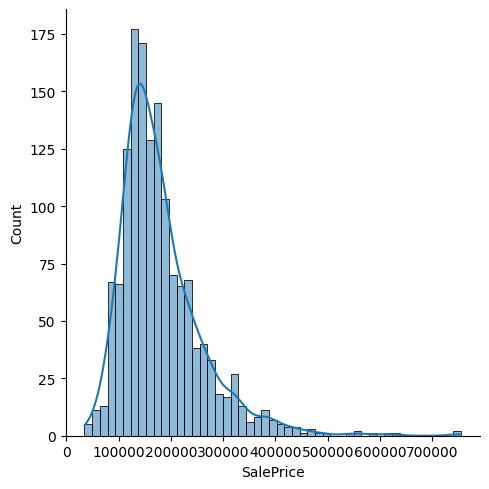

In [155]:
# Plotting the target variable
sns.displot(housing['SalePrice'], kde = True)

In [156]:
# skewness and kurtosis of the target variable
print("Skewness: %f" % housing['SalePrice'].skew())

Skewness: 1.882876


In [157]:
# transforming the target variable to make it more normally distributed
housing['SalePrice'] = np.log1p(housing['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Density'>

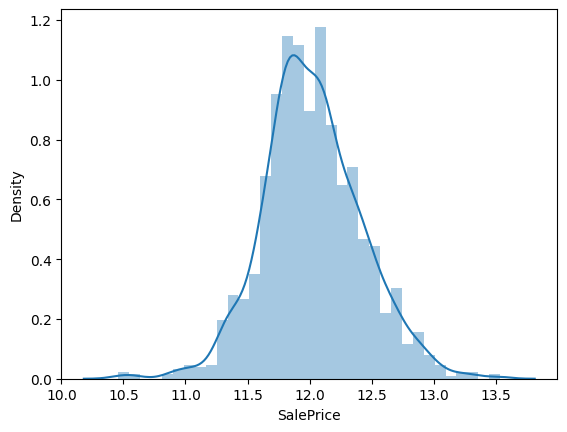

In [158]:
# Plotting the transformed target variable
sns.distplot(housing['SalePrice'], kde = True)

In [159]:
# skewness and kurtosis of the target variable
print("Skewness: %f" % housing['SalePrice'].skew())

Skewness: 0.121347


## Target variable is now normally distributed

Doing EDA on the data

In [160]:
# Checking the correlation of the categorical variables with the target variable
print(housing.select_dtypes(include = 'object').columns)

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')


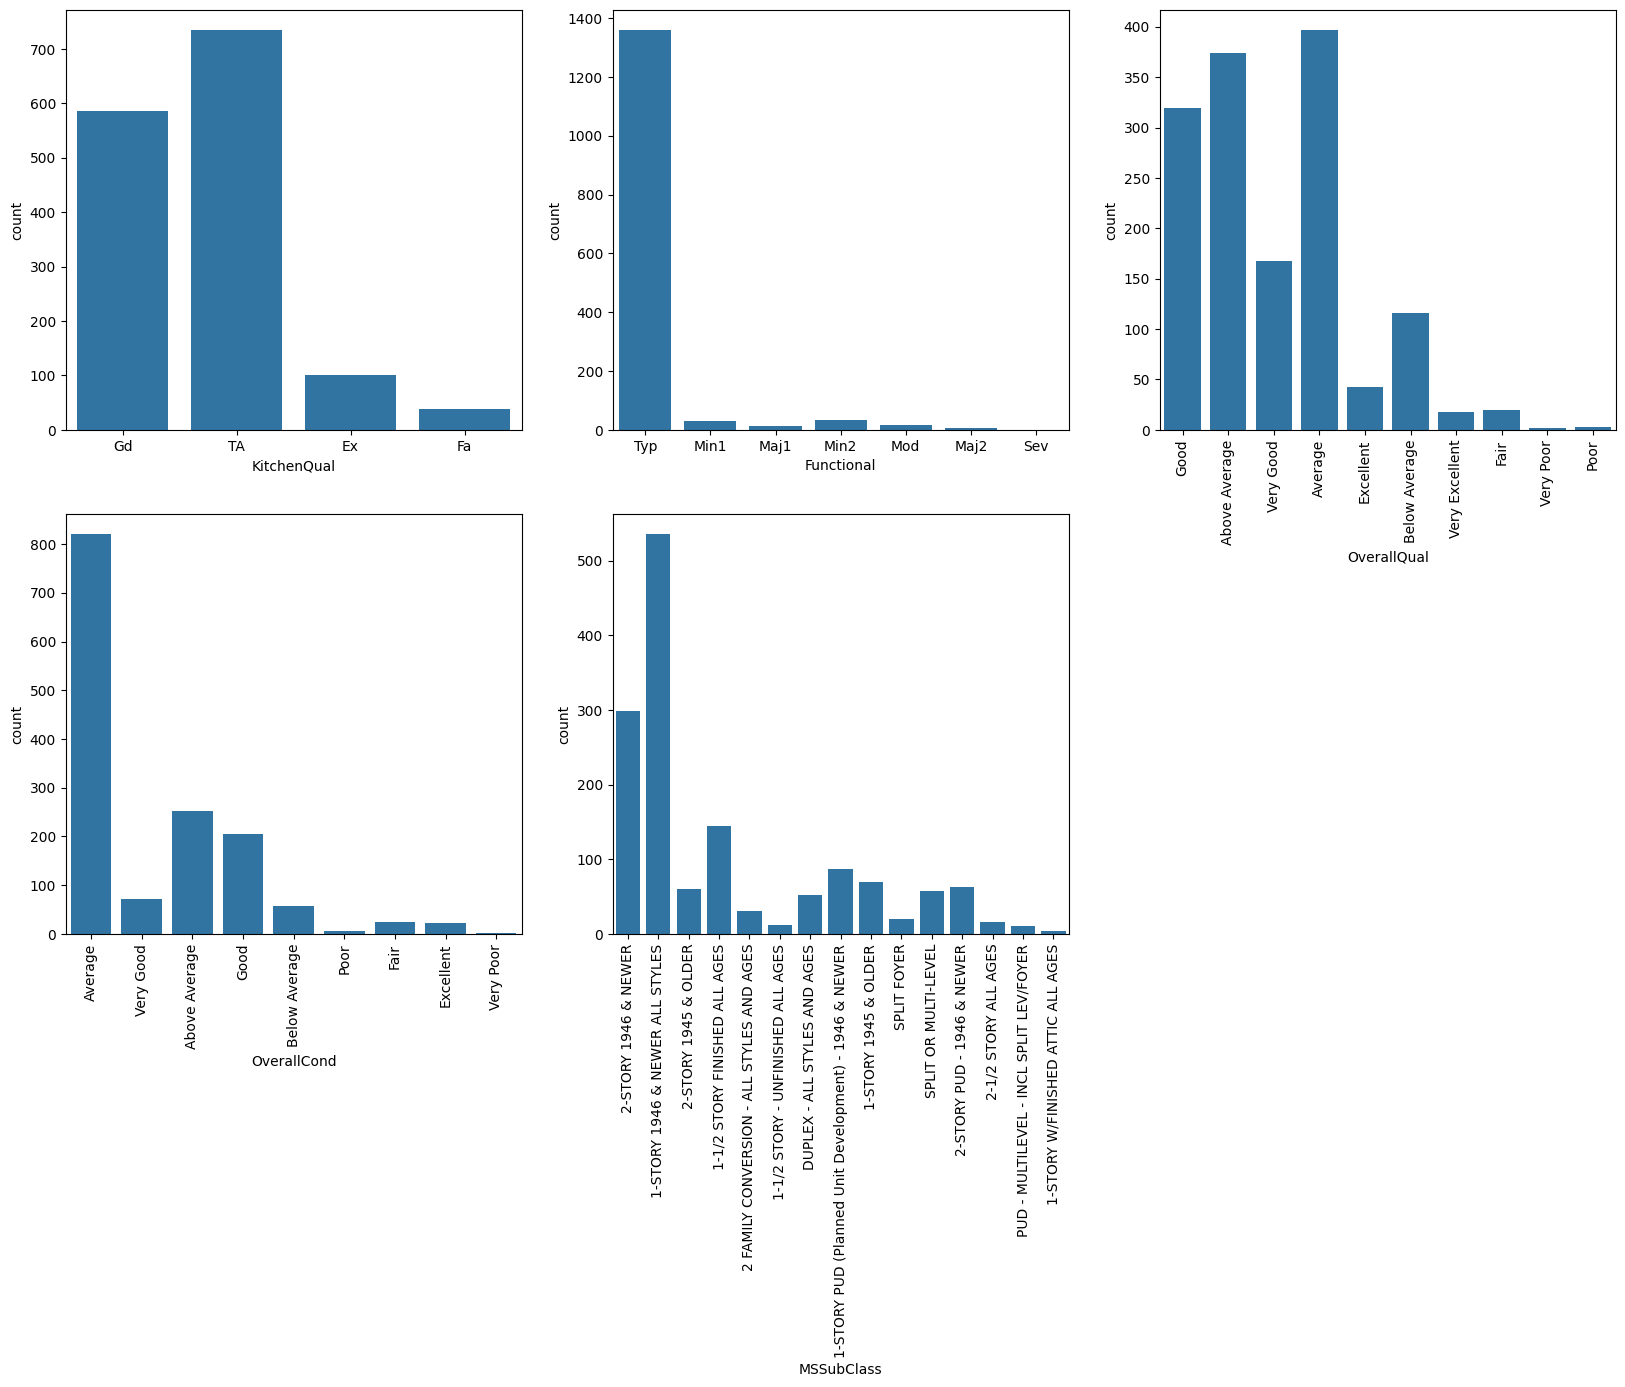

In [161]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'KitchenQual',  data = housing)
plt.subplot(2,3,2)
sns.countplot(x = 'Functional', data = housing)
plt.subplot(2,3,3)
sns.countplot(x = 'OverallQual', data = housing)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'OverallCond', data = housing)
plt.xticks(rotation=90)
plt.subplot(2,3,5)
sns.countplot(x = 'MSSubClass',  data = housing)
plt.xticks(rotation=90)

plt.show()


In [162]:
# Dropping highlly skewed columns
housing.drop(['Functional'],axis=1,inplace=True)


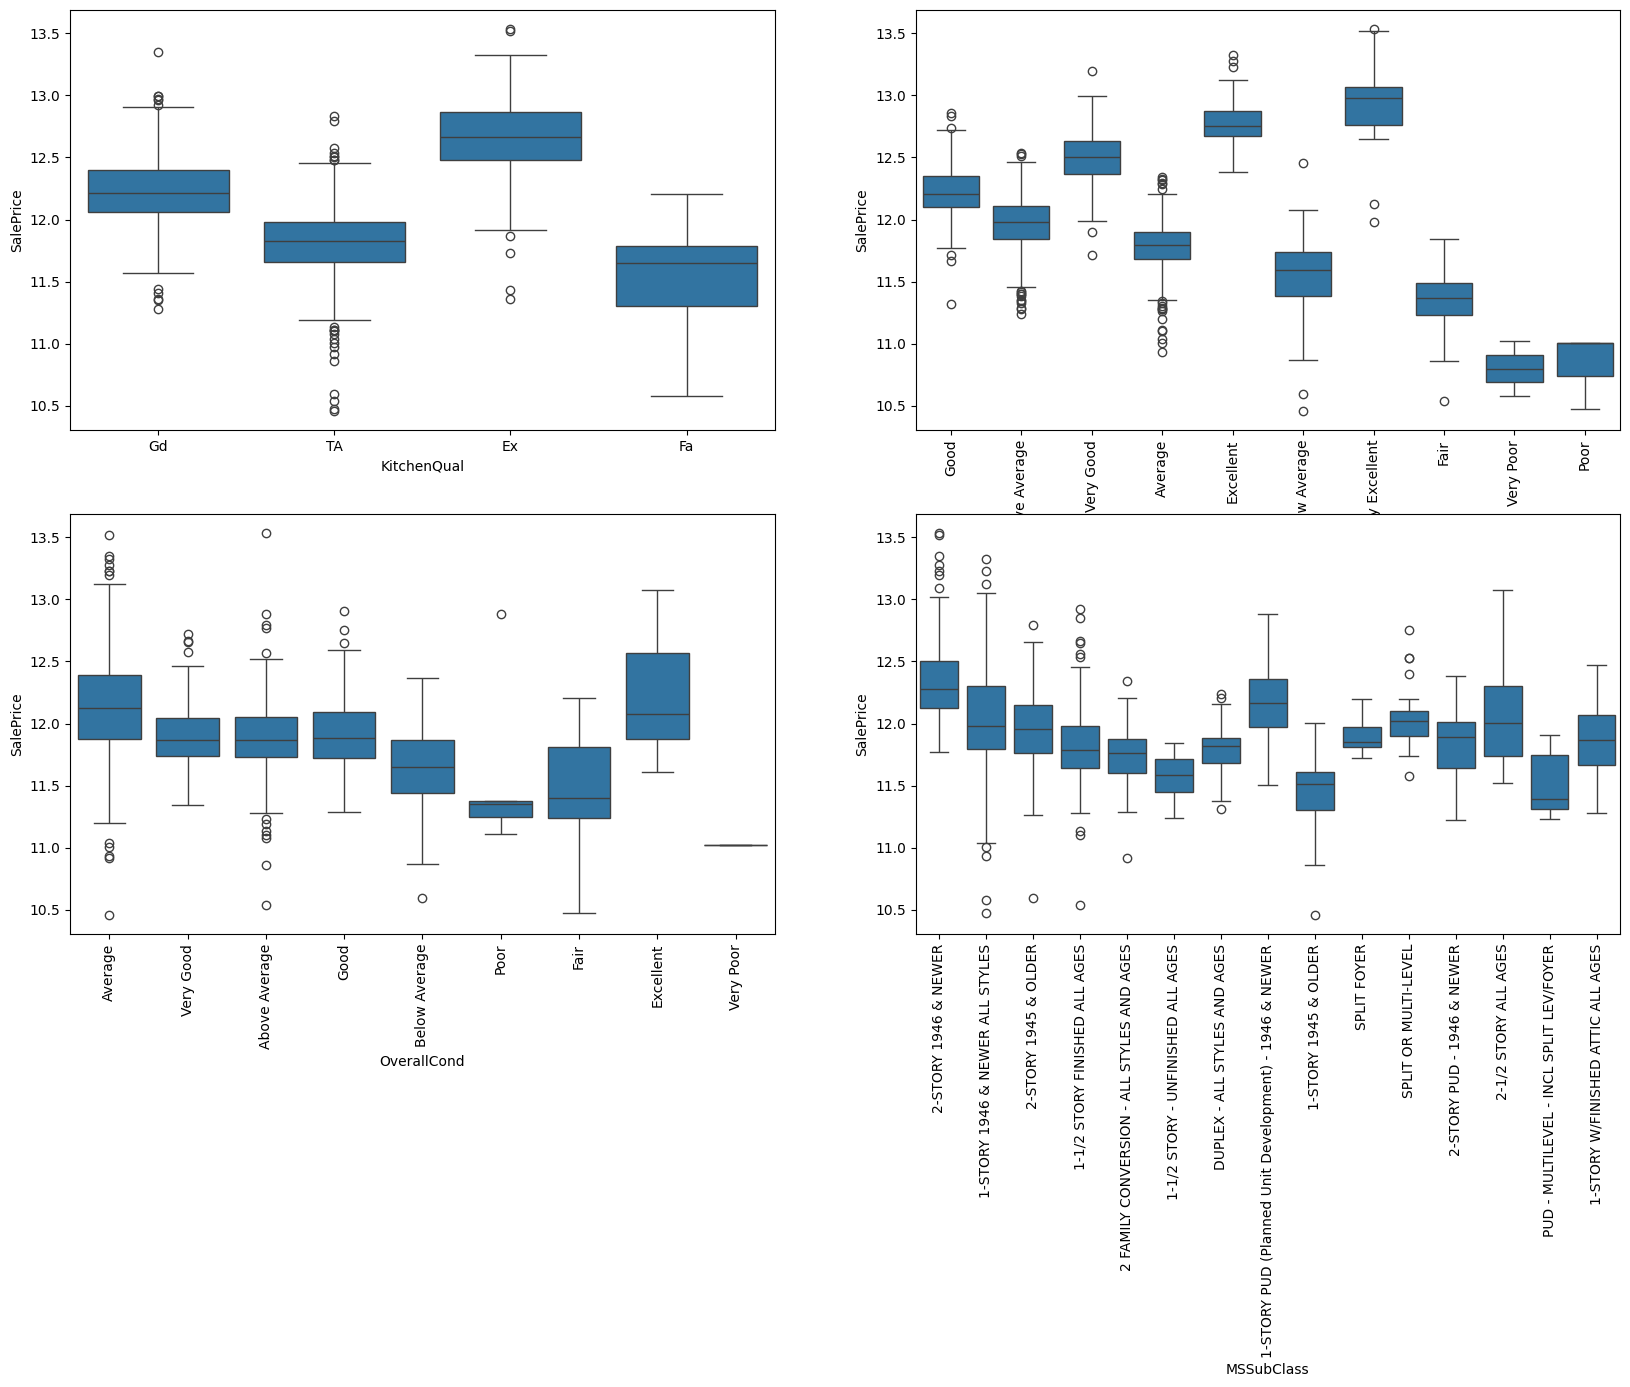

In [163]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x ='KitchenQual', y ='SalePrice', data = housing)
plt.subplot(2,2,2)
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = housing)
plt.xticks(rotation=90)

plt.subplot(2,2,3)
sns.boxplot(x = 'OverallCond', y = 'SalePrice', data = housing)
plt.xticks(rotation=90)

plt.subplot(2,2,4)
sns.boxplot(x = 'MSSubClass', y = 'SalePrice', data = housing)
plt.xticks(rotation=90)

plt.show()

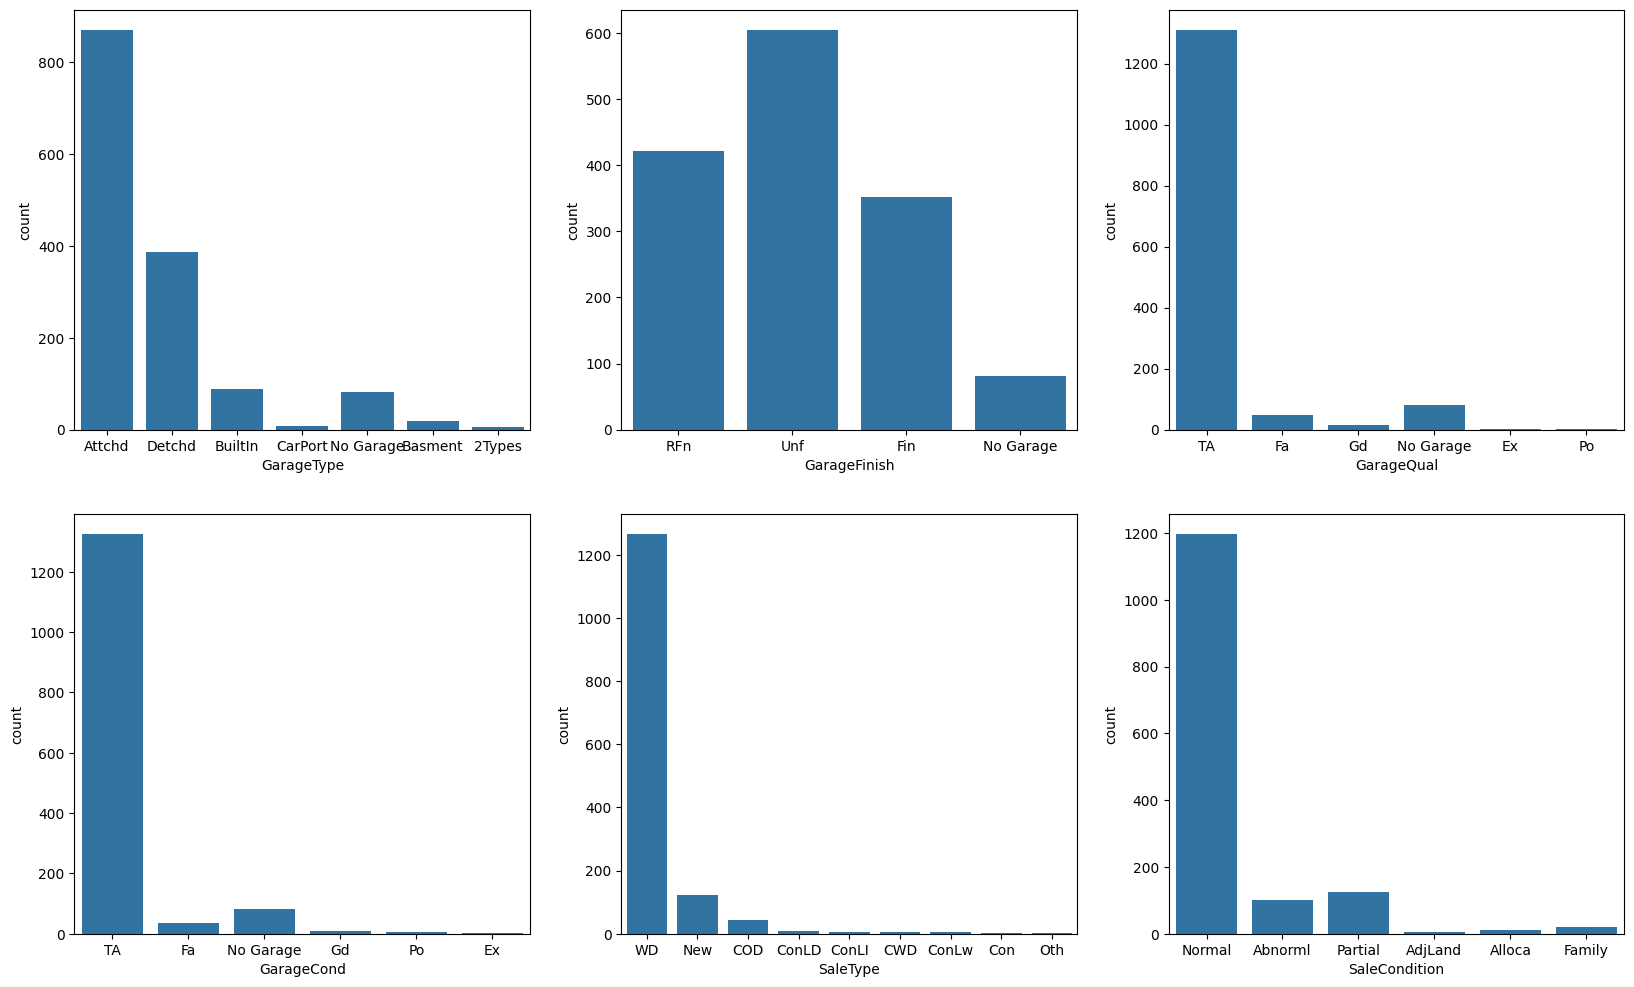

In [164]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'GarageType',  data = housing)
plt.subplot(2,3,2)
sns.countplot(x = 'GarageFinish', data = housing)
plt.subplot(2,3,3)
sns.countplot(x = 'GarageQual', data = housing)
plt.subplot(2,3,4)
sns.countplot(x = 'GarageCond', data = housing)
plt.subplot(2,3,5)
sns.countplot(x = 'SaleType',  data = housing)
plt.subplot(2,3,6)
sns.countplot(x = 'SaleCondition', data = housing)
plt.show()

In [165]:
# All the variables are skewed except for GarageType, GarageFinish

housing['GarageType'] = housing['GarageType'].replace(['Basment','CarPort','2Types'],'Others')
housing['SaleCondition'] = housing['SaleCondition'].replace(['Family','Alloca','AdjLand'],'Others')

# Dropping the columns with high skewness
housing.drop(['GarageQual','GarageCond','SaleType'],axis=1,inplace=True)


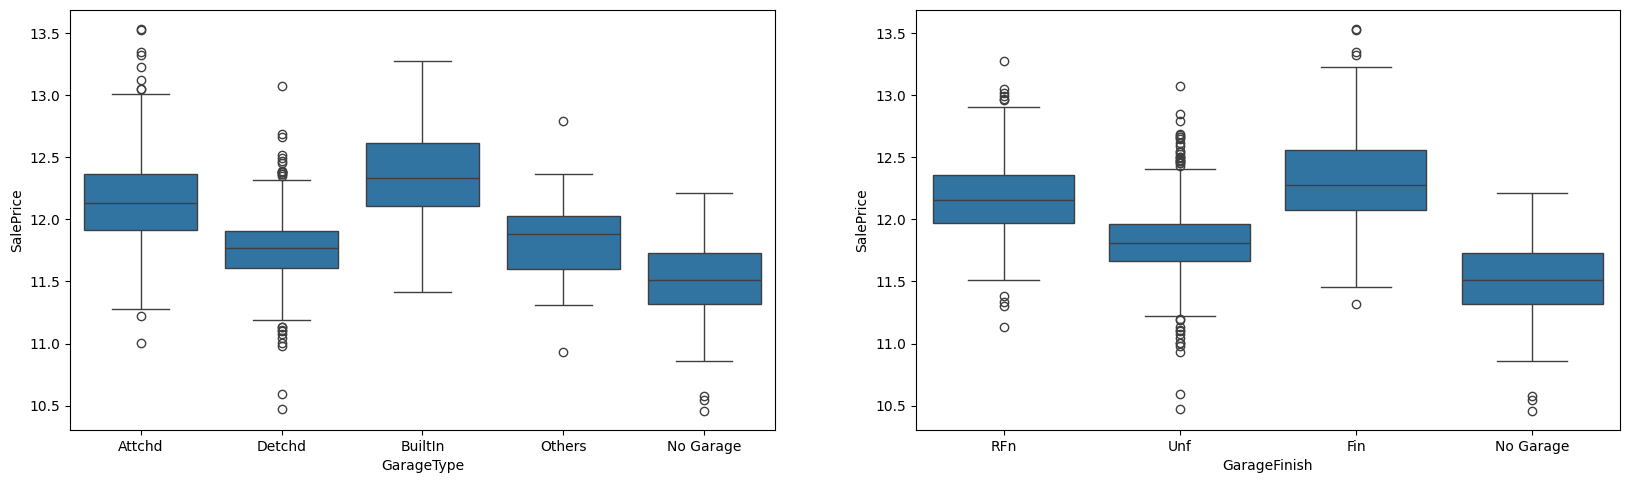

In [166]:
# ploatting GarageType and GarageFinish with the target variable
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x ='GarageType', y ='SalePrice', data = housing)
plt.subplot(2,2,2)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = housing)
plt.show()

 Builtin and Finished GarageType have higher median sale price

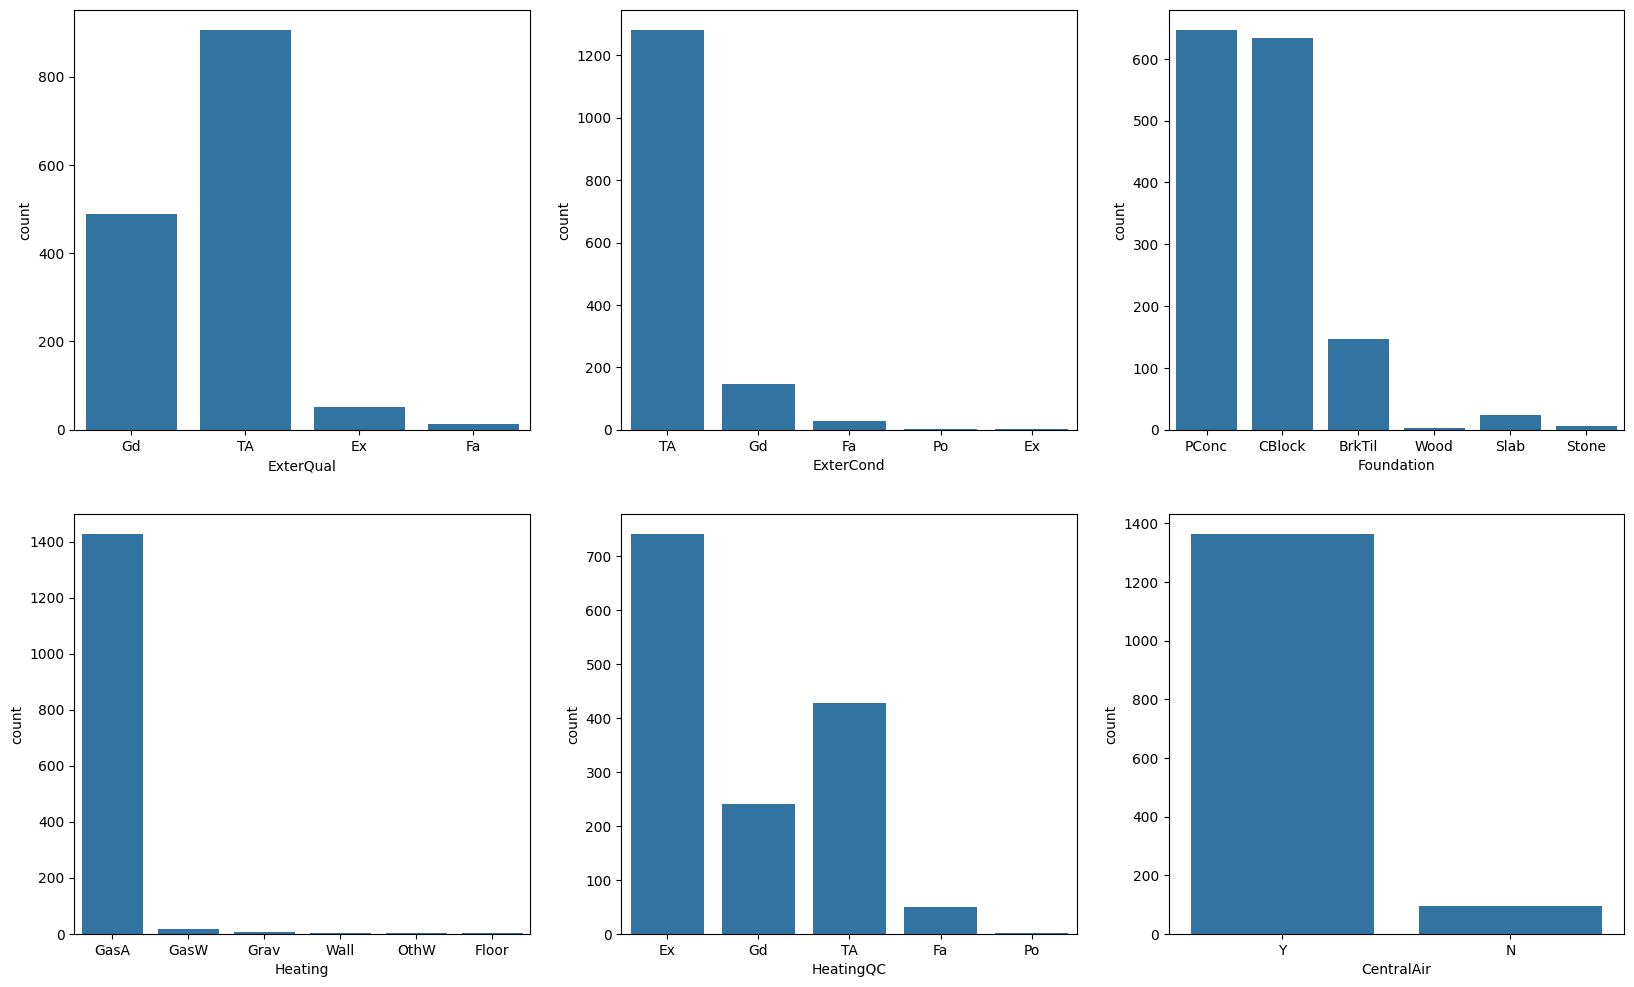

In [167]:
# Plotting next group of categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'ExterQual',  data = housing)
plt.subplot(2,3,2)
sns.countplot(x = 'ExterCond', data = housing)
plt.subplot(2,3,3)
sns.countplot(x = 'Foundation', data = housing)
plt.subplot(2,3,4)
sns.countplot(x = 'Heating', data = housing)
plt.subplot(2,3,5)
sns.countplot(x = 'HeatingQC',  data = housing)
plt.subplot(2,3,6)
sns.countplot(x = 'CentralAir', data = housing)
plt.show()

In [168]:
# some variables like Heating, CentralAir, ExterCond have high skewness, so dropping them
housing.drop(['Heating','CentralAir','ExterCond'],axis=1,inplace=True)

housing['Foundation'] = housing['Foundation'].replace(['Slab','Stone','Wood'],'Others')


<Axes: xlabel='HeatingQC', ylabel='SalePrice'>

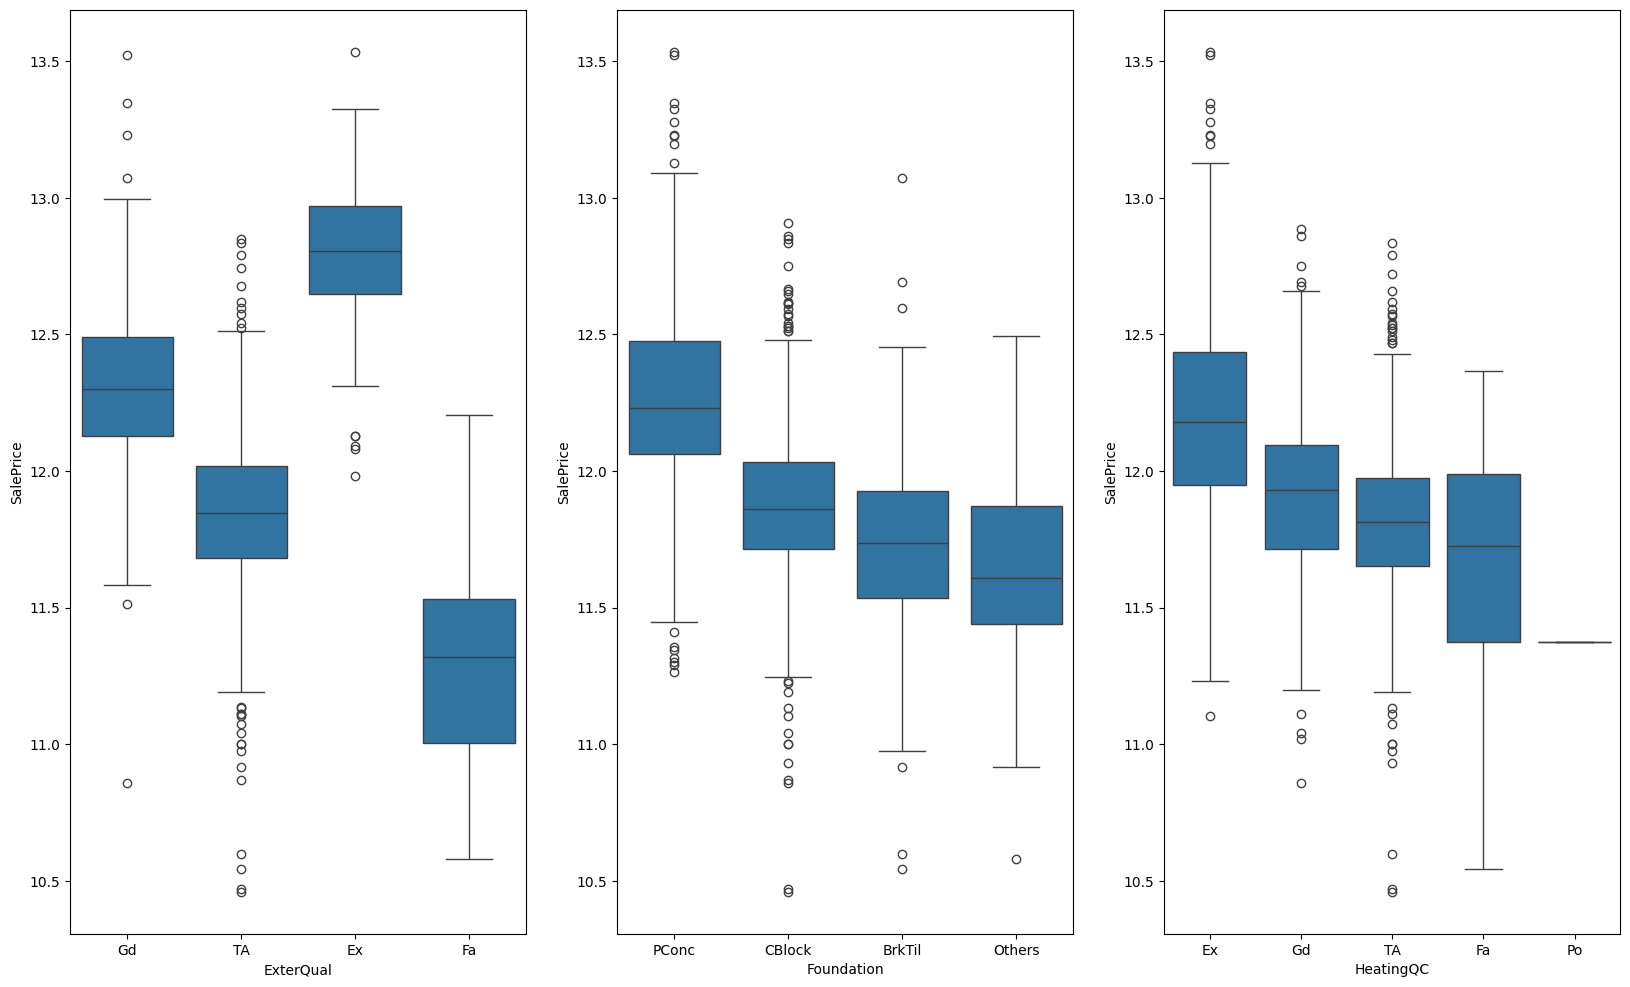

In [169]:
plt.figure(figsize=(20, 12))
plt.subplot(1,3,1)
sns.boxplot(x = 'ExterQual', y ='SalePrice', data = housing)
plt.subplot(1,3,2)
sns.boxplot(x = 'Foundation', y = 'SalePrice', data = housing)
plt.subplot(1,3,3)
sns.boxplot(x = 'HeatingQC', y = 'SalePrice', data = housing)

SalePrice is high for Excellent External Quality, Poured Concrete Foundation and Excellent HeatingQC

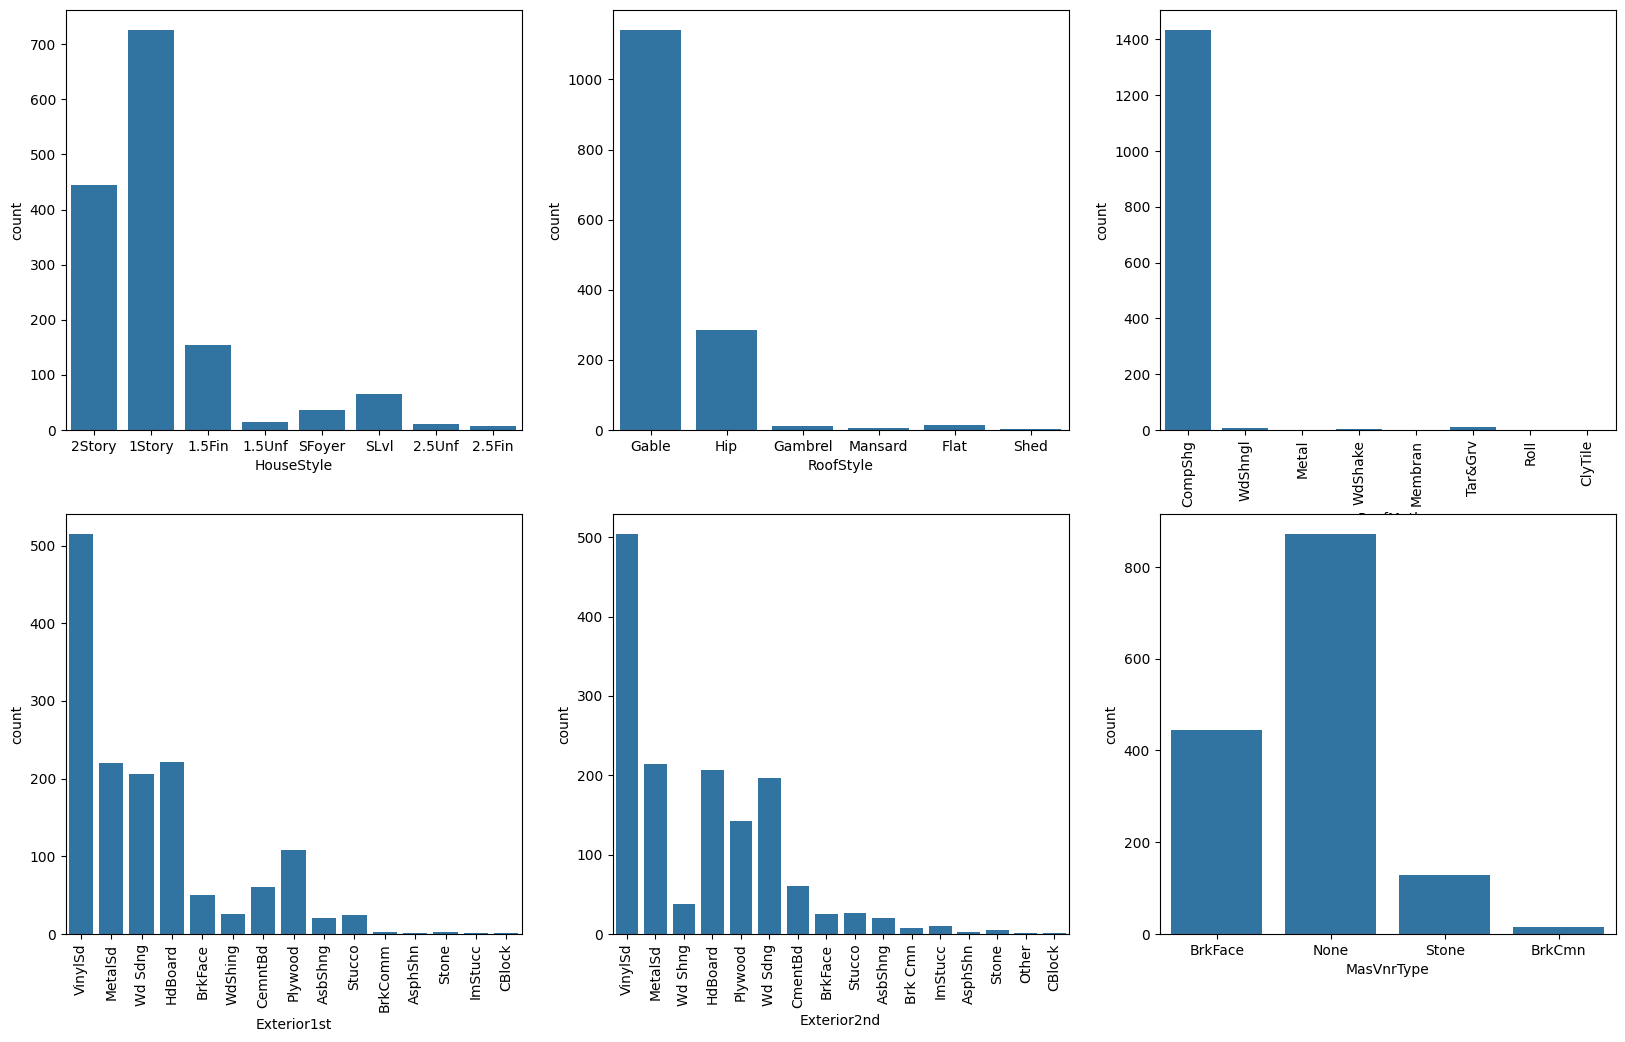

In [170]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'HouseStyle',  data = housing)
plt.subplot(2,3,2)
sns.countplot(x = 'RoofStyle', data = housing)
plt.subplot(2,3,3)
sns.countplot(x = 'RoofMatl', data = housing)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'Exterior1st', data = housing)
plt.xticks(rotation=90)
plt.subplot(2,3,5)
sns.countplot(x = 'Exterior2nd',  data = housing)
plt.xticks(rotation=90)
plt.subplot(2,3,6)
sns.countplot(x = 'MasVnrType', data = housing)
plt.show()

In [171]:
housing['HouseStyle'] = housing['HouseStyle'].replace(['SFoyer','1.5Unf','2.5Unf','2.5Fin'],'Others')
housing['RoofStyle'] = housing['RoofStyle'].replace(['Shed','Mansard','Gambrel','Flat'],'Others')
housing['Exterior1st'] = housing['Exterior1st'].replace(['AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','WdShing'],'Others')
housing['Exterior2nd'] = housing['Exterior2nd'].replace(['Other','AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','BrkFace'],'Others')




# Dropping highly skewed column 
housing.drop(['RoofMatl'],axis=1,inplace=True)

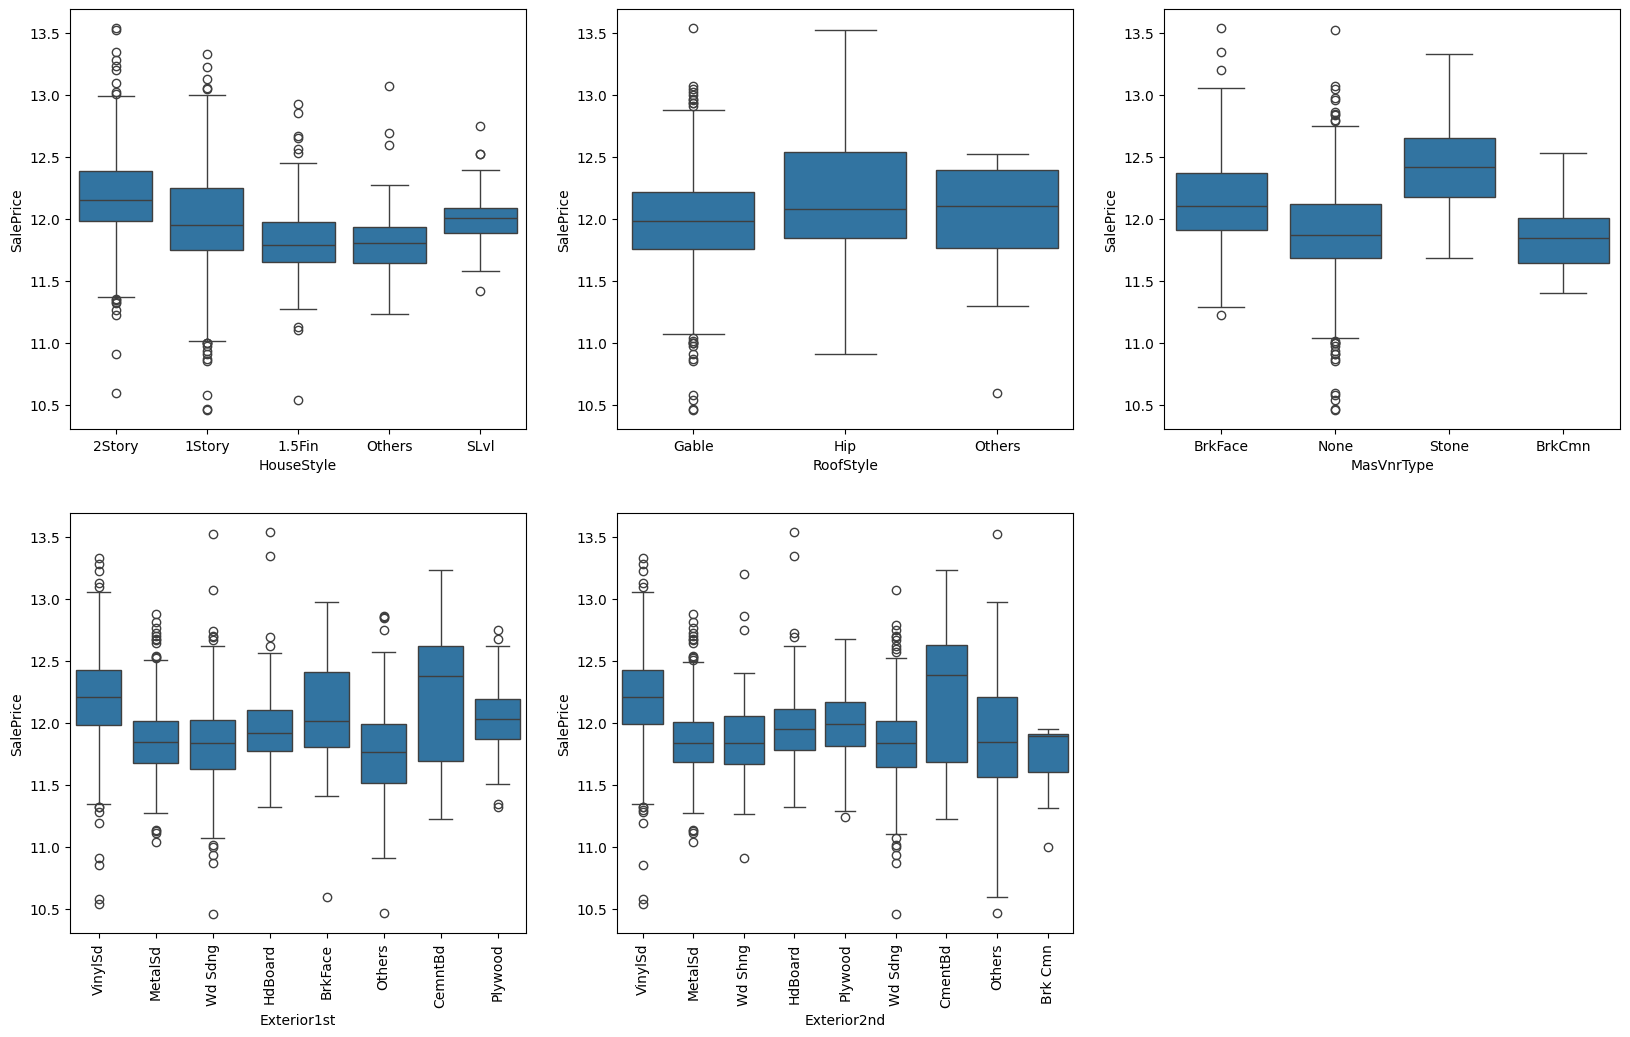

In [172]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'HouseStyle', y ='SalePrice', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = housing)
plt.xticks(rotation=90)
plt.subplot(2,3,5)
sns.boxplot(x = 'Exterior2nd', y = 'SalePrice', data = housing)
plt.xticks(rotation=90)
plt.show()

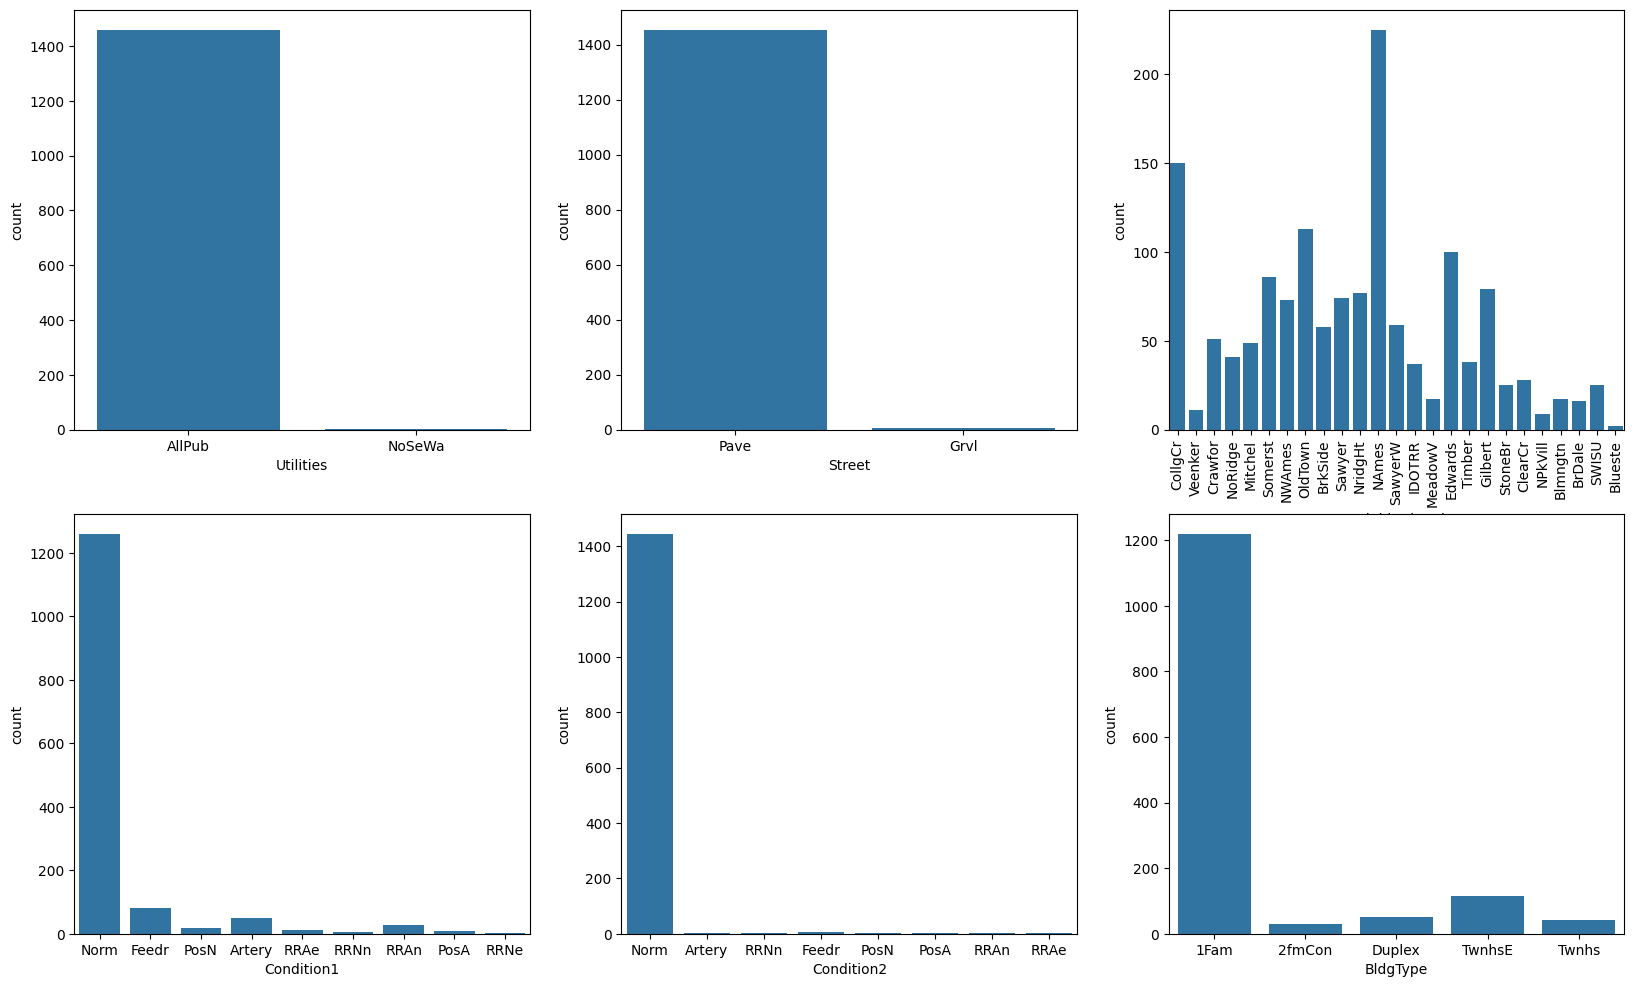

In [173]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'Utilities',  data = housing)
plt.subplot(2,3,2)
sns.countplot(x = 'Street', data = housing)
plt.subplot(2,3,3)
sns.countplot(x = 'Neighborhood', data = housing)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'Condition1', data = housing)
plt.subplot(2,3,5)
sns.countplot(x = 'Condition2',  data = housing)
plt.subplot(2,3,6)
sns.countplot(x = 'BldgType', data = housing)
plt.show()

In [174]:
# Dropping highly skewed column 
housing.drop(['Utilities','Street','Condition1','Condition2'],axis=1,inplace=True)


<Axes: xlabel='BldgType', ylabel='SalePrice'>

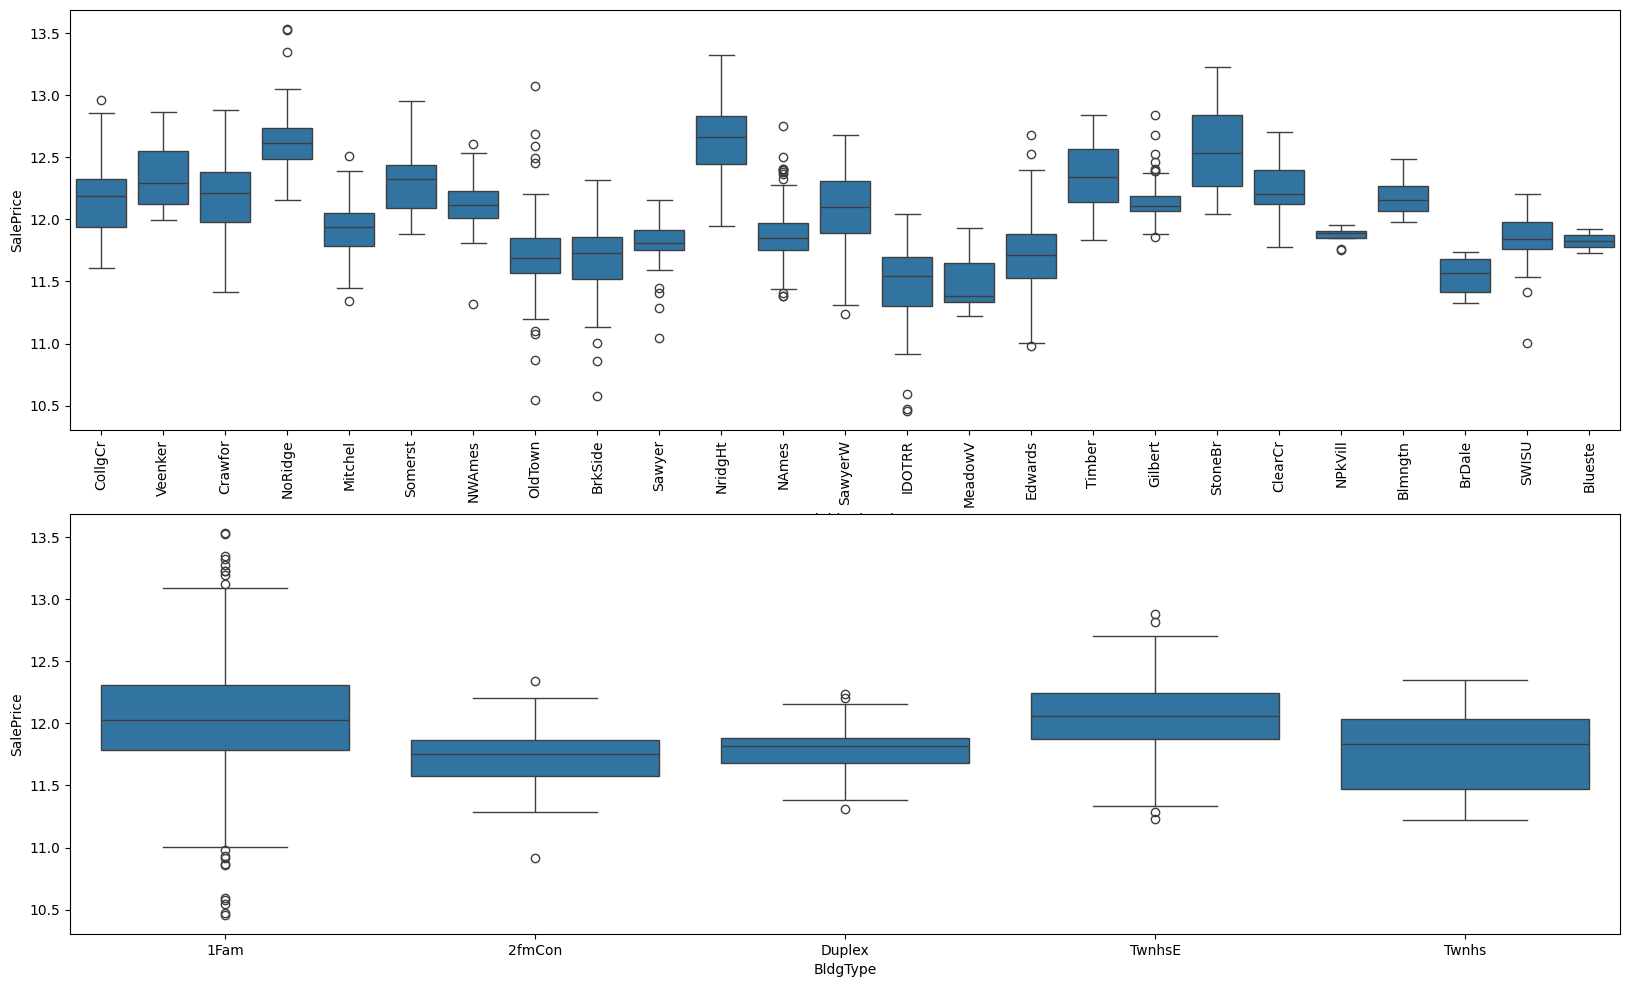

In [175]:
plt.figure(figsize=(20, 12))
plt.subplot(2,1,1)
sns.boxplot(x = 'Neighborhood', y ='SalePrice', data = housing)
plt.xticks(rotation=90)
plt.subplot(2,1,2)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = housing)

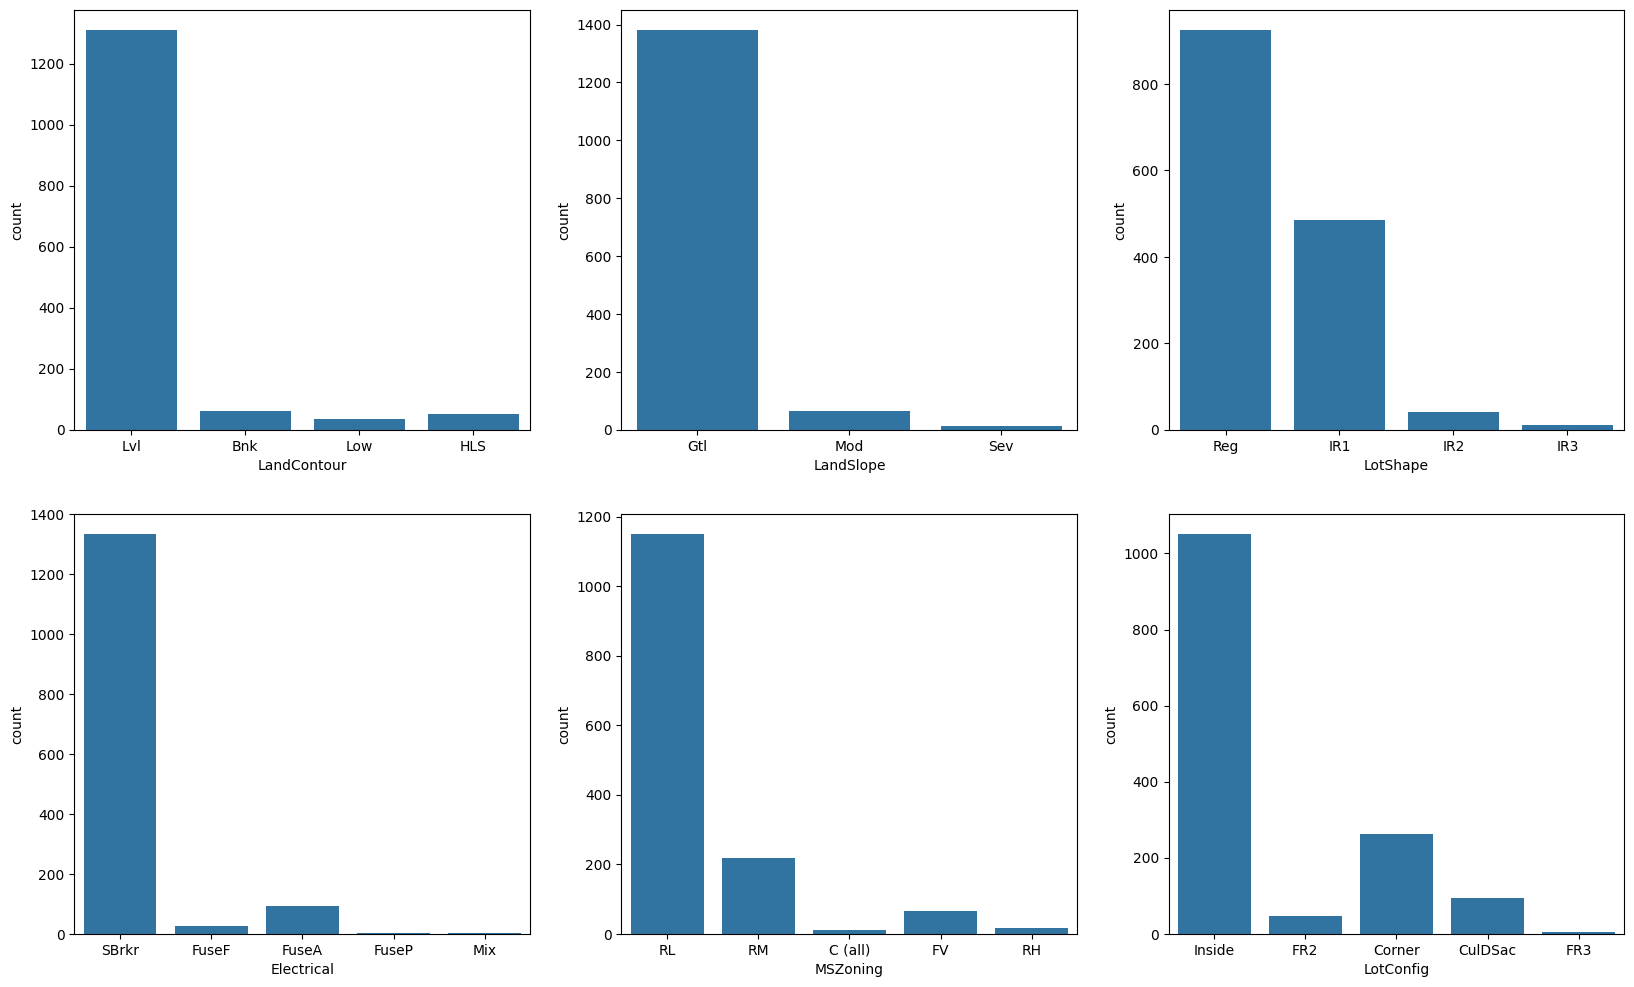

In [176]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'LandContour',  data = housing)
plt.subplot(2,3,2)
sns.countplot(x = 'LandSlope', data = housing)
plt.subplot(2,3,3)
sns.countplot(x = 'LotShape', data = housing)
plt.subplot(2,3,4)
sns.countplot(x = 'Electrical', data = housing)
plt.subplot(2,3,5)
sns.countplot(x = 'MSZoning',  data = housing)
plt.subplot(2,3,6)
sns.countplot(x = 'LotConfig', data = housing)
plt.show()

In [177]:
housing.drop(['LandSlope','LandContour','Electrical'],axis=1,inplace=True)

housing['MSZoning'] = housing['MSZoning'].replace(['RH','C (all)'],'Others')

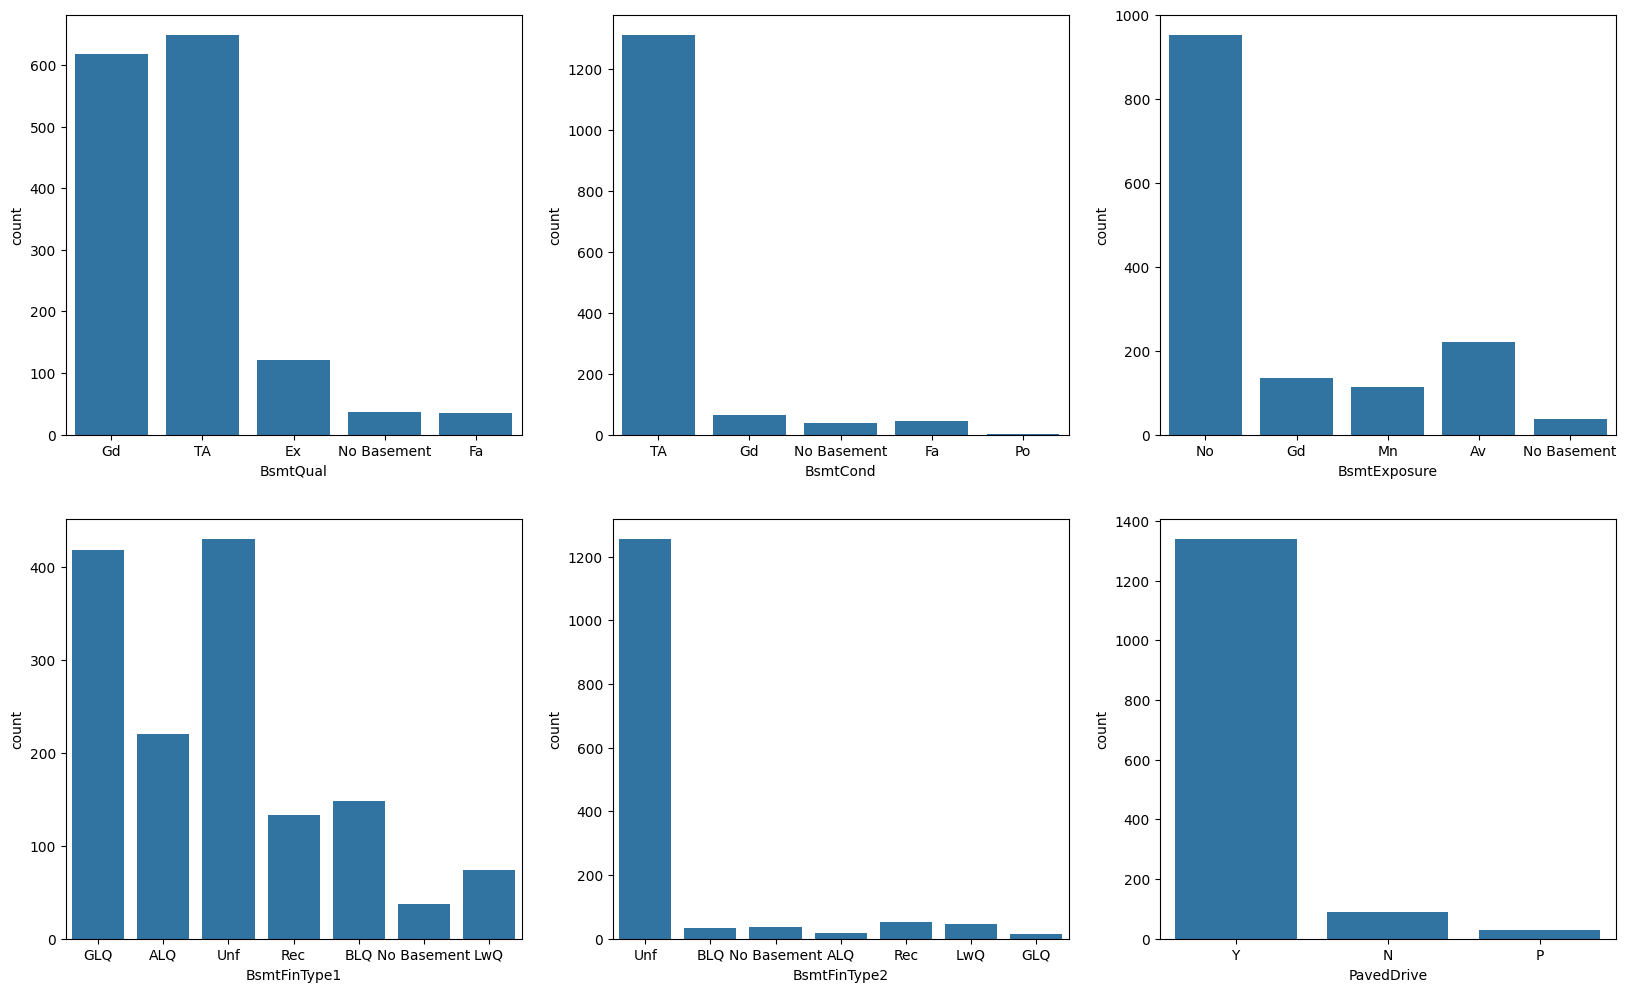

In [178]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'BsmtQual',  data = housing)
plt.subplot(2,3,2)
sns.countplot(x = 'BsmtCond', data = housing)
plt.subplot(2,3,3)
sns.countplot(x = 'BsmtExposure', data = housing)
plt.subplot(2,3,4)
sns.countplot(x = 'BsmtFinType1', data = housing)
plt.subplot(2,3,5)
sns.countplot(x = 'BsmtFinType2',  data = housing)
plt.subplot(2,3,6)
sns.countplot(x = 'PavedDrive', data = housing)
plt.show()

In [179]:
housing.drop(['BsmtFinType2','PavedDrive','BsmtCond'],axis=1,inplace=True)

In [180]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,61,0,0,0,0,0,2,2008,Normal,12.247699
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,0,0,0,5,2007,Normal,12.109016
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,42,0,0,0,0,0,9,2008,Normal,12.317171
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,35,272,0,0,0,0,2,2006,Abnorml,11.849405
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,84,0,0,0,0,0,12,2008,Normal,12.429220


In [183]:
housing['YearSinceRemodel'] = 2010 - ((housing['YearRemodAdd'] - housing['YearBuilt']) + housing['YearBuilt']) #feature engineering

In [185]:
Cat1 = housing.select_dtypes(include=['object']) #checking all categorical columns to form dummy variables
Cat1.columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'GarageType', 'GarageFinish', 'SaleCondition'],
      dtype='object')

In [186]:
Num = housing.select_dtypes(include=['int64','float64']) #all numerical variables
Num.columns

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice',
       'YearSinceRemodel'],
      dtype='object')

In [189]:
Cat1 = Cat1.astype(int) #converting categorical variables to numerical
Cat1 = pd.get_dummies(Cat1,drop_first=True)  # Dummy variables
print(Cat1.shape)

(1460, 130)


In [190]:
Cat1.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,...,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0


In [191]:
# concat dummy variables with main dataset
housing = pd.concat([housing, Cat1], axis=1) 

In [192]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,0,1,0,1,0,0
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,0,0,1,0,1,0,0
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,0,1,0,1,0,0
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,1,0,0,0,0,1,0,0,0
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,0,0,1,0,1,0,0


In [193]:
housing.drop(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish',
       'SaleCondition','Id','OverallCond','MSSubClass','OverallQual'],axis=1,inplace=True) #removing columns as dummy variables already formed

In [194]:
housing.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,0,0,0,0,0,1,0,1,0,0
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,0,0,0,0,0,1,0,1,0,0
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,0,0,0,0,0,1,0,1,0,0
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,0,1,0,0,0,0,1,0,0,0
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,0,0,0,0,0,1,0,1,0,0


In [195]:
housing.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1,inplace=True) #no need of these while making a model 

In [196]:
housing.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,0,0,0,0,1,0,1,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,0,0,0,0,0,1,0,1,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,0,0,0,0,0,1,0,1,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,0,1,0,0,0,0,1,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,0,0,0,0,0,1,0,1,0,0


In [197]:
# Defining the X and y variables
X = housing.drop(['SalePrice'], axis=1)

X.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,0,0,0,0,1,0,1,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,0,0,0,0,0,1,0,1,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,0,0,0,0,0,1,0,1,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,0,1,0,0,0,0,1,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,0,0,0,0,0,1,0,1,0,0


In [198]:
# Putting response variable to y
y = housing['SalePrice']

y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [199]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [200]:
scaler = StandardScaler()

X_train[['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces','GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal']] = scaler.fit_transform(X_train[['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces','GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal']])

X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
210,-0.115302,-0.473765,-0.558025,0.043512,-0.293313,-0.374367,-0.430911,-0.765065,-0.787597,-0.124502,...,0,0,1,0,1,0,0,1,0,0
318,0.926898,-0.056845,0.809137,1.160345,-0.293313,-0.454644,0.621579,0.511914,2.140556,-0.124502,...,0,0,0,0,0,1,0,1,0,0
239,-0.794998,-0.169324,-0.558025,-0.761296,-0.293313,0.171964,-0.712011,-0.930972,0.795996,-0.124502,...,0,1,0,0,0,0,1,1,0,0
986,-0.477806,-0.502297,-0.558025,-0.963574,-0.293313,-0.175904,-1.256778,-0.420683,0.669584,-0.124502,...,0,0,0,0,0,0,1,1,0,0
1416,-0.432493,0.082905,-0.558025,-0.963574,-0.293313,0.475233,-0.620490,0.195183,1.611926,-0.124502,...,0,1,0,0,0,0,1,1,0,0


In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## Model Building and Evaluation using Ridge and Lasso

In [202]:
# list of alphas to tune
params = {'alpha': [0.00004,0.0001, 0.001, 0.01, 0.1, 10,100,1000]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [4e-05, 0.0001, 0.001, 0.01, 0.1, 10, 100,
                                   1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [203]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010515,0.005754,0.006093,0.006555,0.00004,{'alpha': 4e-05},0.868247,0.777081,0.838201,0.890474,...,0.853287,0.042834,5,0.924369,0.935767,0.931027,0.919954,0.918905,0.926005,0.006484
1,0.008235,0.006953,0.004131,0.006534,0.0001,{'alpha': 0.0001},0.868248,0.777081,0.838201,0.890477,...,0.853288,0.042836,4,0.924369,0.935767,0.931027,0.919954,0.918905,0.926005,0.006484
2,0.003563,0.004119,0.002217,0.003300,0.001,{'alpha': 0.001},0.868258,0.777072,0.838200,0.890516,...,0.853309,0.042858,3,0.924369,0.935767,0.931027,0.919954,0.918905,0.926005,0.006484
3,0.009279,0.002706,0.002355,0.001054,0.01,{'alpha': 0.01},0.868367,0.776981,0.838188,0.890866,...,0.853502,0.043071,2,0.924369,0.935766,0.931026,0.919953,0.918903,0.926003,0.006484
4,0.004841,0.004129,0.007215,0.006181,0.1,{'alpha': 0.1},0.869382,0.776055,0.838035,0.892792,...,0.854768,0.044649,1,0.924329,0.935711,0.930967,0.919904,0.918744,0.925931,0.006505


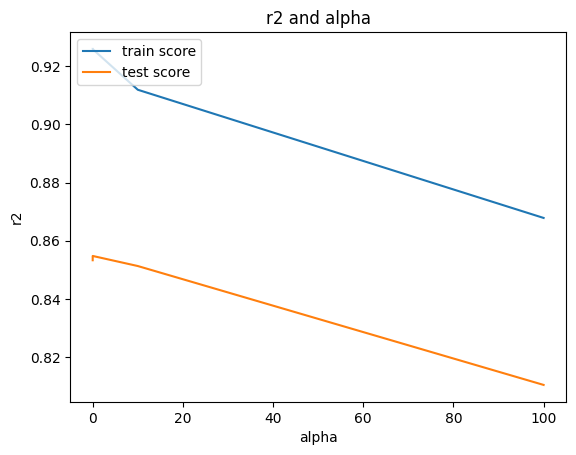

In [204]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')
plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [205]:
# Checking the best alpha value

alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-4.74808084e-04,  1.59466023e-06,  6.17151073e-06,  3.73530503e-06,
        1.15080579e-05,  1.82052285e-05,  3.34485907e-05,  7.92005076e-05,
        1.09011641e-04, -7.70410874e-05,  1.11171057e-04,  4.25417626e-02,
        1.51318356e-02,  5.09513169e-02,  3.69269077e-02,  9.07775958e-03,
       -8.12643631e-02,  8.30688146e-03,  3.96094641e-02,  5.34748927e-02,
        3.43275306e-05,  9.90259483e-05, -5.47694698e-05,  1.22379545e-04,
        1.94885289e-04,  2.27451145e-04, -4.04139863e-04, -3.68900921e-06,
        5.21309564e-04, -1.59511918e-03,  1.22744390e-02, -8.43043105e-02,
        4.98260116e-02,  5.96901149e-03,  1.37242740e-04, -1.20780425e-02,
        2.35020205e-02,  2.51873061e-02, -1.47443390e-05, -4.06687554e-02,
        1.48367725e-02, -2.89977835e-02,  2.13764138e-02,  9.23511792e-03,
       -7.75958574e-02,  1.25976130e-02, -2.93033992e-02,  2.18689602e-02,
       -4.94696396e-02,  7.41418202e-03,  3.66403668e-02, -3.24001846e-02,
       -1.39714779e-02, -

In [206]:
ridge.score(X_train,y_train)

0.9092070718608953

In [207]:
ridge.score(X_test,y_test)

0.8744210143385447

In [208]:
# Ridge model parameters
model_parameters = list(sorted(ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.541),
 ('LotFrontage', -0.143),
 ('LotArea', -0.091),
 ('MasVnrArea', -0.084),
 ('BsmtFinSF1', -0.084),
 ('BsmtFinSF2', -0.082),
 ('BsmtUnfSF', -0.081),
 ('TotalBsmtSF', -0.078),
 ('1stFlrSF', -0.069),
 ('2ndFlrSF', -0.066),
 ('LowQualFinSF', -0.066),
 ('GrLivArea', -0.064),
 ('BsmtFullBath', -0.062),
 ('BsmtHalfBath', -0.06),
 ('FullBath', -0.055),
 ('HalfBath', -0.054),
 ('BedroomAbvGr', -0.052),
 ('KitchenAbvGr', -0.052),
 ('TotRmsAbvGrd', -0.052),
 ('Fireplaces', -0.052),
 ('GarageCars', -0.051),
 ('GarageArea', -0.051),
 ('WoodDeckSF', -0.051),
 ('OpenPorchSF', -0.05),
 ('EnclosedPorch', -0.049),
 ('3SsnPorch', -0.048),
 ('ScreenPorch', -0.048),
 ('PoolArea', -0.046),
 ('MiscVal', -0.042),
 ('MoSold', -0.041),
 ('YearSinceRemodel', -0.033),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.032),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.032),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', -0.032),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',

## Lasso Regression

In [209]:
params = {'alpha': [0.00006,0.0006, 0.0008, 0.001, 0.002, 0.004, 0.006, 0.008 ]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [6e-05, 0.0006, 0.0008, 0.001, 0.002, 0.004,
                                   0.006, 0.008]},
             return_train_score=True, scoring='r2', verbose=1)

In [210]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.111319,0.047995,0.001996,0.001641,0.00006,{'alpha': 6e-05},0.872325,0.773018,0.839581,0.895919,...,0.856191,0.046822,1,0.923862,0.935109,0.930418,0.919443,0.917980,0.925362,0.006517
1,0.021818,0.004994,0.004252,0.006686,0.0006,{'alpha': 0.0006},0.884401,0.724748,0.835349,0.898013,...,0.850393,0.067713,2,0.911534,0.923960,0.918723,0.907989,0.903086,0.913058,0.007462
2,0.021490,0.007120,0.000444,0.000889,0.0008,{'alpha': 0.0008},0.883902,0.709901,0.832624,0.895454,...,0.845629,0.072409,3,0.906265,0.920044,0.913821,0.903300,0.897013,0.908088,0.008059
3,0.024573,0.003977,0.003334,0.001643,0.001,{'alpha': 0.001},0.883078,0.699447,0.827873,0.892849,...,0.841340,0.075588,4,0.901000,0.916719,0.909043,0.898351,0.892075,0.903438,0.008588
4,0.017345,0.004959,0.002250,0.001771,0.002,{'alpha': 0.002},0.877498,0.652922,0.806380,0.884123,...,0.821178,0.089143,5,0.881651,0.901967,0.888512,0.880169,0.871710,0.884802,0.010111


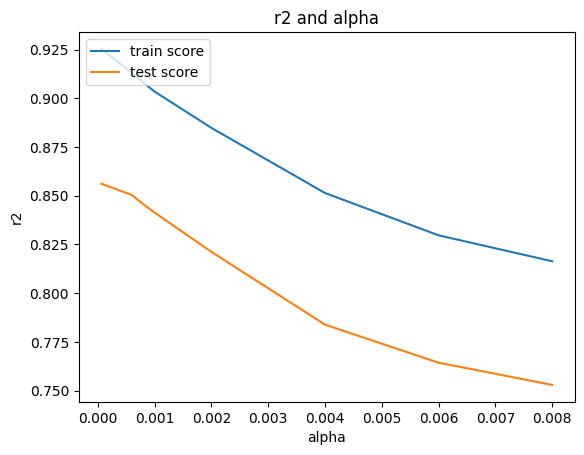

In [211]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')

plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [212]:
# Checking the best alpha value

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [213]:
lasso.coef_

array([-4.09354095e-04,  1.41043030e-06,  1.80671034e-05,  4.75860433e-05,
        4.91107146e-05,  5.55825982e-05,  3.22846991e-05,  1.72775113e-04,
        1.95175790e-04, -2.93139517e-05,  2.33959796e-05,  4.05628950e-02,
        8.97216196e-04,  4.46792333e-02,  3.11474917e-02,  1.36498112e-03,
       -9.96561678e-02,  9.16312063e-03,  4.00953201e-02,  6.11561200e-02,
        3.68093798e-05,  1.11662591e-04, -4.88458052e-05,  1.16322487e-04,
        1.94148114e-04,  2.48685070e-04, -4.72008672e-04, -3.65276522e-06,
        4.33773443e-04, -2.04608878e-03,  0.00000000e+00, -1.01267095e-01,
        3.91867102e-02,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -4.15038457e-02,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -7.80770989e-02,  7.18095307e-03, -3.22274236e-02,  0.00000000e+00,
       -3.77541054e-03,  0.00000000e+00,  3.38535905e-02, -0.00000000e+00,
       -0.00000000e+00, -

In [214]:
lasso.score(X_train,y_train)

0.8982890097979466

In [215]:
lasso.score(X_test,y_test)

0.8646579228611329

In [216]:
# lasso model parameters
model_parameters = list(sorted(lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list((zip(cols, model_parameters)))

[('constant', 11.482),
 ('LotFrontage', -0.21),
 ('LotArea', -0.101),
 ('MasVnrArea', -0.1),
 ('BsmtFinSF1', -0.086),
 ('BsmtFinSF2', -0.083),
 ('BsmtUnfSF', -0.078),
 ('TotalBsmtSF', -0.066),
 ('1stFlrSF', -0.057),
 ('2ndFlrSF', -0.055),
 ('LowQualFinSF', -0.053),
 ('GrLivArea', -0.052),
 ('BsmtFullBath', -0.042),
 ('BsmtHalfBath', -0.039),
 ('FullBath', -0.037),
 ('HalfBath', -0.035),
 ('BedroomAbvGr', -0.034),
 ('KitchenAbvGr', -0.032),
 ('TotRmsAbvGrd', -0.032),
 ('Fireplaces', -0.03),
 ('GarageCars', -0.029),
 ('GarageArea', -0.025),
 ('WoodDeckSF', -0.024),
 ('OpenPorchSF', -0.022),
 ('EnclosedPorch', -0.018),
 ('3SsnPorch', -0.018),
 ('ScreenPorch', -0.017),
 ('PoolArea', -0.017),
 ('MiscVal', -0.017),
 ('MoSold', -0.017),
 ('YearSinceRemodel', -0.016),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.012),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.012),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', -0.01),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER', -0

## Observations

1. R2 score of Ridge model for the train data is 91 and for the test data is 88
2. R2 score of Lasso model for the train data is 89 and for the test data is 87


## Top 5 features selected by lasso

 1. ('GarageFinish_RFn', 0.079),
 2. ('GarageFinish_Unf', 0.084),
 3. ('SaleCondition_Normal', 0.098),
 4. ('SaleCondition_Others', 0.12),
 5. ('SaleCondition_Partial', 0.198)]





## Top 5 features selected by Ridge

1. ('GarageFinish_RFn', 0.092),
2. ('GarageFinish_Unf', 0.094),
3. ('SaleCondition_Normal', 0.099),
4. ('SaleCondition_Others', 0.105),
5. ('SaleCondition_Partial', 0.143)]


## We can choose Lasso model as it helps in feature selection and scores are similar to Ridge model